In [1]:
import pandas as pd
import numpy as np

In [7]:
OS_DIR_BASE = 'L:\data/bc/NextBoaderPossibility/'
LINUX_MNT = '/mnt/landisk/data/bc/NextBoaderPossibility/'

In [8]:
DIR_BASE = LINUX_MNT

In [2]:
data = {'High':np.load('../bc_boader_5_mean_2days_High_normalized.npy'),
        'Low':np.load('../bc_boader_5_mean_2days_Low_normalized.npy'),
        'Open':np.load('../bc_boader_5_mean_2days_Open_normalized.npy'),
        'Close':np.load('../bc_boader_5_mean_2days_Close_normalized.npy')
        #'BoaderValue': np.load('../bc_boader_5_mean_2days_BoaderValue_normalized.npy')
       }

In [3]:
# normalize rate
# try 1: max value of the range
toIndex = len(data['High'])-1
dataLength = len(data['High'][0])
progress = -1
inputData = []

for index in range(0,toIndex):
    currentProgress = int((index/toIndex)*100)
    if int(currentProgress/10) != int(progress/10):
        progress = currentProgress
        print(progress)
        npInputData = np.array(inputData, dtype=np.float32)
        np.save(f'bc_MAboaderPossibility_5_2days_input_anormalized_{progress}', npInputData)
        del npInputData
        inputData = []
    inputData.append([data['High'][index], data['Low'][index], data['Open'][index], data['Close'][index]])

del data

10
20
30
40
50
60
70
80
90


In [3]:
npInputData = np.array(inputData, dtype=np.float32)
np.save(f'bc_MAboaderPossibility_5_2days_input_anormalized_100', npInputData)

NameError: name 'inputData' is not defined

In [4]:
data = {'BoaderValue': np.load('../bc_boader_5_mean_2days_BoaderValue_normalized.npy')}

In [5]:
# normalize rate
# try 1: max value of the range
toIndex = len(data['BoaderValue'])-1
dataLength = len(data['BoaderValue'][0])
progress = -1
ansData  = []

for index in range(0,toIndex):
    currentProgress = int((index/toIndex)*100)
    if int(currentProgress/10) != int(progress/10):
        progress = currentProgress
        print(progress)
        npAnsData = np.array(ansData, dtype=np.float32)
        np.save(f'bc_MAboaderPossibility_5_2days_ans_anormalized_{progress}', npAnsData)
        del npAnsData
        ansData = []
    ansData.append(data['BoaderValue'][index])

10
20
30
40
50
60
70
80
90


In [6]:
npAnsData = np.array(ansData, dtype=np.float32)
np.save(f'bc_MAboaderPossibility_5_2days_ans_anormalized_100', npAnsData)

In [9]:
npInputData = np.load(f'{DIR_BASE}input/bc_MAboaderPossibility_5_2days_input_anormalized_10.npy')

#for num in range(20,110, 10):
#    npInputData2 = np.load(f'bc_MAboaderPossibility_5_2days_input_anormalized_{num}.npy')
#    npInputData = np.append(npInputData,npInputData2,axis=0)
#
#del npInputData2

In [27]:
npInputData.shape

(363167, 4, 577)

In [2]:
import random
import pandas as pd
import numpy as np
import torch
import datetime
import random

In [6]:
round((1.15 - 0.85)*10000)

3000

In [3]:
dtype = torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda:0


In [5]:
initialIndex = 50
class BCBoaderDataset:
    def __init__(self, isTraining = True, seed=0):
        random.seed(seed)
        inputData =  np.load(f'{DIR_BASE}input/bc_MAboaderPossibility_5_2days_input_anormalized_{initialIndex}.npy')
        for num in range(initialIndex+10,110, 10):
            npInputData2 = np.load(f'{DIR_BASE}input/bc_MAboaderPossibility_5_2days_input_anormalized_{num}.npy')
            inputData = np.append(inputData,npInputData2,axis=0)
        npInputData2 = None
        del npInputData2
        all_data = torch.from_numpy(inputData).to(dtype)
        inputData = None
        del inputData
        length = len(all_data)
        indexes = random.sample(range(0, length-1), k=length-1)
        if isTraining:
            fromIndex = 0
            toIndex = int(length*0.7)
        else:
            fromIndex = int(length*0.7)+1
            toIndex = length+1
        indexes = indexes[fromIndex:toIndex]
        self.data = all_data[indexes]
        ansData = np.load(f'{DIR_BASE}input/bc_MAboaderPossibility_5_2days_ans_anormalized_{initialIndex}.npy')
        for num in range(initialIndex+10,110, 10):
            npAnsData2 = np.load(f'{DIR_BASE}input/bc_MAboaderPossibility_5_2days_ans_anormalized_{num}.npy')
            ansData = np.append(ansData,npAnsData2,axis=0)
        npAnsData2 = None
        del npAnsData2
        index = 0
        length = round((1.15 - 0.85)*10000)
        self.ans = np.zeros((len(ansData),length), dtype='float32')
        for value in ansData:
            i = round((value[-1] -0.85)*10000)
            if i >= 3000:
                i = 2999
            if i < 0:
                i = 0
            self.ans[index][i] = 1
            index = index+1
        ansData = None
        del ansData
        self.ans = torch.from_numpy(self.ans).to(dtype)[indexes]
        self.dataRange = datetime.timedelta(days=2)
        self.dims = 5
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, ndx):
            
        return self.data[ndx].to(device), self.ans[ndx].to(device)

In [49]:
class BCBoaderDataset:
    def __init__(self, isTraining = True, seed=0, mode="default"):
        random.seed(seed)
        self.all_data = pd.read_csv(f'{DIR_BASE}/input/bitcoin_boader_5_mean_filled15.csv',  header=0, index_col=0, parse_dates=True)
        self.all_data = self.all_data.sort_index()
        length = len(self.all_data)
        
        ##select random indices.
        self.indices = random.sample(range(0, length-1), k=length-1)
        if isTraining:
            self.fromIndex = 0
            self.toIndex = int(length*0.7)
        else:
            self.fromIndex = int(length*0.7)+1
            self.toIndex = length+1
            
        self.dataRange = datetime.timedelta(days=2)
        self.dims = 5
        self.mode = mode
        INTERVAL_DAYS = 2
        MINUTES_SPAN = 5

        totalMinutes = INTERVAL_DAYS * 24 * 60
        self.span  = int(totalMinutes/MINUTES_SPAN)+1
        
        if self.mode == "nrate":
            self.outputFunc = self.__getNormalizedAnsRates__
        elif self.mode == "default":
            self.outputFunc = self.__getAnsRates__
        elif self.mode == "array":
            self.outputFunc = self.__getAnsArray__
        
    def __rateToArray__(self, value):
        output = [0 for i in range(0,3000)]
        i = round((value -0.85)*10000)
        if i >= 3000:
            i = 2999
        elif i < 0:
            i = 0
        output[i] = 1
        return output
        
    def __len__(self):
        return self.toIndex - self.fromIndex
    
    def __getAnsRates__(self,ndx):
        ans = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                currentValue = self.all_data['Close'].iloc[index]
                ans.append(self.all_data['BoaderValue'].iloc[index]/currentValue)
        else:
            index = ndx
            currentValue = self.all_data['Close'].iloc[index]
            ans = [self.all_data['BoaderValue'].iloc[index]/currentValue]
        return ans
    
    def __getNormalizedAnsRates__(self,ndx):
        ans = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                maxValue = self.all_data['High'].iloc[index:index+self.span].values.max()
                ans.append(self.all_data['BoaderValue'].iloc[index]/maxValue)
        else:
            index = ndx
            maxValue = self.all_data['High'].iloc[index:index+self.span].values.max()
            ans = [self.all_data['BoaderValue'].iloc[index]/maxValue]
        return ans
    
    def __getAnsArray__(self, ndx):
        ans = []
        for value in self.__getNormalizedAnsRates__(ndx):
            ans.append(
                self.__rateToArray__(value)
            )
        return ans
    
    def __getInputs__(self, ndx):
        inputs = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                maxValue = self.all_data['High'].iloc[index:index+self.span].values.max()
                inputs.append([
                    self.all_data['High'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['Low'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['Open'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['Close'].iloc[index:index+self.span].values/maxValue]
                )
        else:
            index = ndx
            maxValue = self.all_data['High'].iloc[index:index+self.span].values.max()
            inputs = [
                    self.all_data['High'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['Low'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['Open'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['Close'].iloc[index:index+self.span].values/maxValue
            ]

        return inputs
    
    def __getitem__(self, ndx):
        inputs = numpy.array(self.__getInputs__(ndx))
        outputs = numpy.array(self.outputFunc(ndx))
        return torch.tensor(inputs, device=device).to(dtype=dtype), torch.tensor(outputs, device=device).to(dtype=dtype)
    
    def changeMode(self, mode):
        self.mode = mode
        if self.mode == "nrate":
            self.outputFunc = self.__getNormalizedAnsRates__
        elif self.mode == "default":
            self.outputFunc = self.__getAnsRates__
        elif self.mode == "array":
            self.outputFunc = self.__getAnsArray__

In [45]:
batch_size=32

In [50]:
train_ds = BCBoaderDataset(True, 1017, "array")

In [24]:
from torch.utils.data import DataLoader

In [72]:
train_dl = DataLoader(train_ds, batch_size = batch_size, drop_last = True)

In [10]:
import random
import datetime
import numpy
import pandas as pd

class FXBoaderDataset:
    def __init__(self, data, isTraining = True, seed=0, mode="default"):
        random.seed(seed)
        self.all_data = data
        self.all_data = self.all_data.sort_index()
        length = len(self.all_data)
        
        ##select random indices.
        self.indices = random.sample(range(0, length-1), k=length-1)
        if isTraining:
            self.fromIndex = 0
            self.toIndex = int(length*0.7)
        else:
            self.fromIndex = int(length*0.7)+1
            self.toIndex = length+1
            
        self.dataRange = datetime.timedelta(days=2)
        self.dims = 5
        self.mode = mode
        INTERVAL_DAYS = 2
        MINUTES_SPAN = 5

        totalMinutes = INTERVAL_DAYS * 24 * 60
        self.span  = int(totalMinutes/MINUTES_SPAN)+1
        
        if self.mode == "nrate":
            self.outputFunc = self.__getNormalizedAnsRates__
        elif self.mode == "default":
            self.outputFunc = self.__getAnsRates__
        elif self.mode == "array":
            self.outputFunc = self.__getAnsArray__
        
    def __rateToArray__(self, value):
        output = [0 for i in range(0,3000)]
        i = round((value -0.85)*10000)
        if i >= 3000:
            i = 2999
        elif i < 0:
            i = 0
        output[i] = 1
        return output
        
    def __len__(self):
        return self.toIndex - self.fromIndex
    
    def __getAnsRates__(self,ndx):
        ans = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                currentValue = self.all_data['close'].iloc[index]
                ans.append(self.all_data['BoaderValue'].iloc[index]/currentValue)
        else:
            index = ndx
            currentValue = self.all_data['close'].iloc[index]
            ans = [self.all_data['BoaderValue'].iloc[index]/currentValue]
        return ans
    
    def __getNormalizedAnsRates__(self,ndx):
        ans = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                maxValue = self.all_data['high'].iloc[index:index+self.span].values.max()
                ans.append(self.all_data['BoaderValue'].iloc[index]/maxValue)
        else:
            index = ndx
            maxValue = self.all_data['high'].iloc[index:index+self.span].values.max()
            ans = [self.all_data['BoaderValue'].iloc[index]/maxValue]
        return ans
    
    def __getAnsArray__(self, ndx):
        ans = []
        for value in self.__getNormalizedAnsRates__(ndx):
            ans.append(
                self.__rateToArray__(value)
            )
        return ans
    
    def __getInputs__(self, ndx):
        inputs = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                maxValue = self.all_data['high'].iloc[index:index+self.span].values.max()
                inputs.append([
                    self.all_data['high'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['low'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['open'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['close'].iloc[index:index+self.span].values/maxValue]
                )
        else:
            index = ndx
            maxValue = self.all_data['high'].iloc[index:index+self.span].values.max()
            inputs = [
                    self.all_data['high'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['low'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['open'].iloc[index:index+self.span].values/maxValue,
                    self.all_data['close'].iloc[index:index+self.span].values/maxValue
            ]

        return inputs
    
    def __getitem__(self, ndx):
        inputs = numpy.array(self.__getInputs__(ndx))
        outputs = numpy.array(self.outputFunc(ndx))
        return torch.tensor(inputs, device=device).to(dtype=dtype), torch.tensor(outputs, device=device).to(dtype=dtype)
        #return inputs, outputs
    
    def changeMode(self, mode):
        self.mode = mode
        if self.mode == "nrate":
            self.outputFunc = self.__getNormalizedAnsRates__
        elif self.mode == "default":
            self.outputFunc = self.__getAnsRates__
        elif self.mode == "array":
            self.outputFunc = self.__getAnsArray__

In [44]:
def AddBoaderValue(rates, frame, removeNan=True):
    def updateNextBoaders(start, end, value):
        for i in range(start, end+1):
            nextBoaders.append(value)
        
    data = rates.copy()
    ma = data.close.rolling(frame).mean()
    if ma[frame-1] == numpy.NaN:
        print("invalid")
        return None
    data["EMA"] = ma
    initial = frame
    startIndex = initial
    nextBoaders = [numpy.NaN for i in range(0,initial)]
    trend = 0
    
    for index in range(initial, len(data)):
        diff = data.EMA[index-1] - data.EMA[index]
        if diff >= 0:
            if trend == -1:
                updateNextBoaders(startIndex, index, data.EMA[index])
                startIndex = index+1
            trend = 1
        else:
            if trend == 1:
                updateNextBoaders(startIndex, index, data.EMA[index])
                startIndex = index+1
            trend = -1

    updateNextBoaders(startIndex, len(data)-1, numpy.NaN)
    result = len(data) == len(nextBoaders)
    print(f"Result:{result}")
    if result:
        data["BoaderValue"] = nextBoaders
        if removeNan:
            return data[frame:startIndex]
        else:
            return data
        

In [16]:
rates = AddBoaderValue(pd.read_csv(f'/mnt/landisk/data/fx/NextBoaderPossibility/fx_USDJPY_5_2020-08-03T23-05-00_to_2021-12-04T07-50-00.csv'), 10)

Result:True


In [17]:
rates = AddBoaderValue(pd.read_csv(f'/mnt/landisk/data/fx/NextBoaderPossibility/fx_USDJPY_5_2020-08-03T23-05-00_to_2021-12-04T07-50-00.csv'), 10)
train_ds = FXBoaderDataset(rates, True, 1017, "array")

In [25]:
i,o = train_ds[0:10]

In [26]:
i.shape

torch.Size([10, 4, 577])

# Learning

In [4]:
import torch.nn.functional as F
import torch.nn as nn
import random

In [13]:
#batch_size = inputData.shape[0]
size =577

In [1]:
torch.cuda.is_available()

NameError: name 'torch' is not defined

In [6]:
length = round((1.15 - 0.85)*10000)

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4,16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16,32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(32,16, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(16,8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16*size, length)
        self.fc1_2 = nn.Linear(16*size, 8*size)
        self.fc2 = nn.Linear(8*size, length)
        self.softmax = nn.Softmax(1)
        
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = F.relu(self.conv3(out))
        #out = torch.tanh(self.conv4(out))
        #out = out.view(-1, 16*size)
        out = F.relu(self.fc1(out))
        #out = out.view(-1, 8*size)
        #out = F.relu(self.fc2(out))
        out = self.softmax(out)
        #out = self.fc2(out)
        return out

In [31]:
model = Net().to(device)

In [32]:
inputData, outputData = train_ds[0:10]
out = model(inputData)

In [33]:
print(out.shape)
print(outputData.shape)

torch.Size([10, 3000])
torch.Size([10, 3000])


In [34]:
 torch.topk(out,3)

torch.return_types.topk(
values=tensor([[0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004],
        [0.0004, 0.0004, 0.0004]], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([[1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237],
        [1226, 2500, 2237]], device='cuda:0'))

In [35]:
import torch.optim as optim

In [36]:
from torch.utils.data import DataLoader

In [37]:
import datetime

In [30]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random
    
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, mode="graph"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()
    losses = []
    for epoch in range(1, n_epochs+1):
        loss_train  = 0.0
        
        for inputValues, ansValue in train_loader:
            outputs = model(inputValues)
            #print(f'output {outputs.shape}, ansValue {ansValue.shape}')
            loss = loss_fn(outputs, ansValue)
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if mode == "graph":
            losses.append(loss_train/len(train_loader))
            ax.clear()
            ax.plot(losses)
            fig.canvas.draw()
        else:
            if epoch == 1 or epoch % 10 == 0:
                print(f'{datetime.datetime.now()} Epoch {epoch}, Training loss {loss_train/len(train_loader)}')

### BitCoin

In [11]:
train_ds = BCBoaderDataset(True, 2056)

In [78]:
batch_size=32
train_dl = DataLoader(train_ds, batch_size = batch_size,  drop_last = True, shuffle=True)

In [41]:
#optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [100]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [101]:
loss_fn = nn.MSELoss()

In [102]:
training_loop(n_epochs =300, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)

2021-12-04 14:07:36.606388 Epoch 1, Training loss 0.0003331648174955459
2021-12-04 15:42:40.466771 Epoch 10, Training loss 0.0003330560226754241
2021-12-04 17:32:05.463300 Epoch 20, Training loss 0.0003330489131283257
2021-12-04 19:27:00.093167 Epoch 30, Training loss 0.0003330483321692024
2021-12-04 21:36:14.122407 Epoch 40, Training loss 0.00033304800627447493
2021-12-05 01:08:38.539143 Epoch 50, Training loss 0.00033304774696503843
2021-12-05 02:47:40.290454 Epoch 60, Training loss 0.00033304766998853443
2021-12-05 04:27:16.736211 Epoch 70, Training loss 0.0003330475189135797
2021-12-05 06:06:18.807785 Epoch 80, Training loss 0.0003330473889302925
2021-12-05 07:45:23.799927 Epoch 90, Training loss 0.0003330473243199294


KeyboardInterrupt: 

In [103]:
torch.save(model.state_dict(), 'bc_boaderRatePossibility_5_2days_adam_temp')

In [39]:
model.load_state_dict(torch.load(f'{DIR_BASE}/model/bc_boaderPossibility_5_2days_adam_v4', map_location=device))

<All keys matched successfully>

In [40]:
dummy_input, dummy_output = train_ds[0:1]

In [41]:
dummy_input.shape

torch.Size([1, 4, 577])

In [42]:
torch.onnx.export(model, dummy_input, 'bc_boaderPossibility_5_2days_adam_v4.onnx')

In [64]:
val_ds = BCBoaderDataset(False, 1017)

In [65]:
val_dl = DataLoader(val_ds, batch_size = 10)

In [66]:
val_dl = DataLoader(val_ds, batch_size = 10)
def rateCal(index):
    return index/10000  + 0.85

def validate(model, train_loader, val_loader):
    for name, loader in [("val", val_loader)]:
        with torch.no_grad():
            correct = 0
            count = 0
            for values, anses in loader:
                outputs = model(values)
                for index in range(0, len(outputs)-1):
                    count = count + 1
                    result = torch.topk(outputs[index], 3)
                    print(result)
                    ans = torch.topk(anses[index], 1)
                    candidate1 = rateCal(result[1][0])
                    candidate2 = rateCal(result[1][1])
                    candidate3 = rateCal(result[1][2])
                    total = result[0][0] +  result[0][1] + result[0][2]
                    mean = candidate1 * (result[0][0]/total) + candidate2*(result[0][1]/total) + candidate3*(result[0][2]/total)
                    ansValue = rateCal(ans[1])
                    correct = correct + mean/ansValue
                        
    
    print('--------------------------------------------------')
    print(f'{correct/count}')
    print('--------------------------------------------------')
            

In [67]:
validate(model, train_dl, val_dl)

torch.return_types.topk(
values=tensor([0.9569, 0.0260, 0.0046]),
indices=tensor([1378, 1330, 1395]))
torch.return_types.topk(
values=tensor([0.1415, 0.0767, 0.0456]),
indices=tensor([1550, 1394, 1403]))
torch.return_types.topk(
values=tensor([0.1109, 0.0659, 0.0556]),
indices=tensor([1383, 1387, 1403]))
torch.return_types.topk(
values=tensor([0.1029, 0.0849, 0.0614]),
indices=tensor([1110, 1321, 1145]))
torch.return_types.topk(
values=tensor([0.3731, 0.1136, 0.0519]),
indices=tensor([1022, 1009, 1436]))
torch.return_types.topk(
values=tensor([0.9798, 0.0016, 0.0012]),
indices=tensor([1319, 1375, 1403]))
torch.return_types.topk(
values=tensor([0.2616, 0.0396, 0.0370]),
indices=tensor([1110, 1218, 1082]))
torch.return_types.topk(
values=tensor([0.9875, 0.0057, 0.0015]),
indices=tensor([1266, 1359, 1255]))
torch.return_types.topk(
values=tensor([9.9920e-01, 5.5859e-05, 4.6387e-05]),
indices=tensor([1110, 1022, 1120]))
torch.return_types.topk(
values=tensor([0.7895, 0.0174, 0.0153]),
indi

torch.return_types.topk(
values=tensor([0.9716, 0.0025, 0.0020]),
indices=tensor([1421, 1496, 1438]))
torch.return_types.topk(
values=tensor([0.1972, 0.0781, 0.0370]),
indices=tensor([1421, 1329, 1493]))
torch.return_types.topk(
values=tensor([9.9821e-01, 3.7379e-04, 1.7534e-04]),
indices=tensor([1156, 1338, 1377]))
torch.return_types.topk(
values=tensor([0.9587, 0.0115, 0.0058]),
indices=tensor([1304, 1282, 1380]))
torch.return_types.topk(
values=tensor([0.3174, 0.0415, 0.0383]),
indices=tensor([1272, 1403, 1303]))
torch.return_types.topk(
values=tensor([0.9796, 0.0020, 0.0014]),
indices=tensor([1213, 1219, 1383]))
torch.return_types.topk(
values=tensor([0.0763, 0.0653, 0.0535]),
indices=tensor([1244, 1152,  996]))
torch.return_types.topk(
values=tensor([0.9550, 0.0322, 0.0017]),
indices=tensor([1117, 1164, 1674]))
torch.return_types.topk(
values=tensor([9.9563e-01, 2.9737e-03, 6.3365e-04]),
indices=tensor([1180, 1346, 1359]))
torch.return_types.topk(
values=tensor([9.9984e-01, 1.7978

torch.return_types.topk(
values=tensor([0.8972, 0.0066, 0.0059]),
indices=tensor([1355, 1154, 1395]))
torch.return_types.topk(
values=tensor([0.6511, 0.0544, 0.0278]),
indices=tensor([1227, 1403, 1313]))
torch.return_types.topk(
values=tensor([0.4943, 0.0622, 0.0455]),
indices=tensor([1262, 1308, 1152]))
torch.return_types.topk(
values=tensor([0.0857, 0.0681, 0.0611]),
indices=tensor([1496, 1313, 1413]))
torch.return_types.topk(
values=tensor([0.1362, 0.0523, 0.0511]),
indices=tensor([1409, 1496, 1223]))
torch.return_types.topk(
values=tensor([0.8944, 0.0102, 0.0091]),
indices=tensor([1081, 1433, 1223]))
torch.return_types.topk(
values=tensor([0.2149, 0.1251, 0.0485]),
indices=tensor([1395, 1064, 1382]))
torch.return_types.topk(
values=tensor([0.4062, 0.0711, 0.0212]),
indices=tensor([1269, 1112,  970]))
torch.return_types.topk(
values=tensor([9.9421e-01, 1.4490e-03, 5.3779e-04]),
indices=tensor([1258, 1296, 1438]))
torch.return_types.topk(
values=tensor([9.9936e-01, 3.3094e-05, 2.7171

torch.return_types.topk(
values=tensor([0.2013, 0.0538, 0.0459]),
indices=tensor([1413, 1354, 1031]))
torch.return_types.topk(
values=tensor([0.8841, 0.0106, 0.0062]),
indices=tensor([1168, 1330, 1286]))
torch.return_types.topk(
values=tensor([0.9043, 0.0099, 0.0054]),
indices=tensor([1403, 1409, 1329]))
torch.return_types.topk(
values=tensor([9.8533e-01, 9.6123e-03, 8.1234e-04]),
indices=tensor([1194, 1168, 1403]))
torch.return_types.topk(
values=tensor([0.1808, 0.1297, 0.0920]),
indices=tensor([1550, 1406, 1489]))
torch.return_types.topk(
values=tensor([0.9796, 0.0022, 0.0019]),
indices=tensor([1380, 1308, 1053]))
torch.return_types.topk(
values=tensor([0.0656, 0.0593, 0.0543]),
indices=tensor([1413, 1550, 1403]))
torch.return_types.topk(
values=tensor([0.2937, 0.0335, 0.0301]),
indices=tensor([1114, 1238, 1112]))
torch.return_types.topk(
values=tensor([0.2726, 0.0361, 0.0331]),
indices=tensor([1495, 1498, 1499]))
torch.return_types.topk(
values=tensor([0.1073, 0.0807, 0.0616]),
indi

torch.return_types.topk(
values=tensor([0.9139, 0.0056, 0.0055]),
indices=tensor([1214, 1413,  996]))
torch.return_types.topk(
values=tensor([0.8347, 0.0111, 0.0088]),
indices=tensor([1248,  956, 1395]))
torch.return_types.topk(
values=tensor([0.8443, 0.0127, 0.0093]),
indices=tensor([1030, 1110, 1345]))
torch.return_types.topk(
values=tensor([0.9649, 0.0025, 0.0022]),
indices=tensor([1417, 1496, 1489]))
torch.return_types.topk(
values=tensor([0.9714, 0.0041, 0.0020]),
indices=tensor([1438, 1406, 1496]))
torch.return_types.topk(
values=tensor([0.5821, 0.2760, 0.0175]),
indices=tensor([1421, 1455, 1437]))
torch.return_types.topk(
values=tensor([0.0681, 0.0614, 0.0504]),
indices=tensor([1403, 1550,  970]))
torch.return_types.topk(
values=tensor([0.5510, 0.3551, 0.0123]),
indices=tensor([1269, 1305, 1292]))
torch.return_types.topk(
values=tensor([0.9363, 0.0066, 0.0042]),
indices=tensor([1417, 1496, 1394]))
torch.return_types.topk(
values=tensor([0.9188, 0.0054, 0.0043]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.8360, 0.0127, 0.0089]),
indices=tensor([1319, 1448, 1387]))
torch.return_types.topk(
values=tensor([0.9251, 0.0698, 0.0019]),
indices=tensor([1134, 1268, 1386]))
torch.return_types.topk(
values=tensor([9.9997e-01, 9.2714e-06, 3.2025e-06]),
indices=tensor([1134, 1386, 1268]))
torch.return_types.topk(
values=tensor([0.0854, 0.0718, 0.0673]),
indices=tensor([1145, 1022, 1489]))
torch.return_types.topk(
values=tensor([0.0847, 0.0565, 0.0484]),
indices=tensor([1117, 1009, 1455]))
torch.return_types.topk(
values=tensor([0.1690, 0.1336, 0.1210]),
indices=tensor([1421, 1435, 1403]))
torch.return_types.topk(
values=tensor([0.0726, 0.0646, 0.0642]),
indices=tensor([1325, 1433, 1286]))
torch.return_types.topk(
values=tensor([0.6350, 0.0685, 0.0144]),
indices=tensor([1380, 1496, 1214]))
torch.return_types.topk(
values=tensor([9.9976e-01, 1.2023e-04, 1.9844e-05]),
indices=tensor([1436, 1413, 1438]))
torch.return_types.topk(
values=tensor([0.9679, 0.0069, 0.

torch.return_types.topk(
values=tensor([0.0420, 0.0333, 0.0325]),
indices=tensor([1045, 1192, 1313]))
torch.return_types.topk(
values=tensor([9.9868e-01, 8.4328e-05, 6.8326e-05]),
indices=tensor([1383, 1403, 1047]))
torch.return_types.topk(
values=tensor([0.7043, 0.0211, 0.0156]),
indices=tensor([1421, 1445, 1293]))
torch.return_types.topk(
values=tensor([0.2610, 0.1211, 0.0636]),
indices=tensor([1465, 1453, 1403]))
torch.return_types.topk(
values=tensor([0.9263, 0.0069, 0.0059]),
indices=tensor([1120, 1255, 1152]))
torch.return_types.topk(
values=tensor([0.0764, 0.0534, 0.0396]),
indices=tensor([1448, 1348, 1445]))
torch.return_types.topk(
values=tensor([0.0937, 0.0646, 0.0471]),
indices=tensor([1403,  941, 1550]))
torch.return_types.topk(
values=tensor([0.0583, 0.0567, 0.0543]),
indices=tensor([1465, 1489, 1403]))
torch.return_types.topk(
values=tensor([0.0474, 0.0461, 0.0413]),
indices=tensor([1214, 1110, 1009]))
torch.return_types.topk(
values=tensor([0.3678, 0.0463, 0.0461]),
indi

torch.return_types.topk(
values=tensor([0.2064, 0.0860, 0.0734]),
indices=tensor([1421, 1438, 1496]))
torch.return_types.topk(
values=tensor([0.2644, 0.0539, 0.0451]),
indices=tensor([1390, 1403, 1496]))
torch.return_types.topk(
values=tensor([0.3324, 0.0487, 0.0423]),
indices=tensor([1493, 1393, 1550]))
torch.return_types.topk(
values=tensor([0.1197, 0.0590, 0.0527]),
indices=tensor([1123, 1218, 1053]))
torch.return_types.topk(
values=tensor([0.9827, 0.0081, 0.0029]),
indices=tensor([1436, 1413, 1398]))
torch.return_types.topk(
values=tensor([0.0795, 0.0473, 0.0453]),
indices=tensor([1403, 1329, 1284]))
torch.return_types.topk(
values=tensor([9.2555e-01, 7.1943e-02, 3.6012e-04]),
indices=tensor([1219, 1284, 1223]))
torch.return_types.topk(
values=tensor([0.0658, 0.0534, 0.0513]),
indices=tensor([1203, 1345, 1389]))
torch.return_types.topk(
values=tensor([9.9551e-01, 3.6311e-04, 2.0779e-04]),
indices=tensor([1243, 1309,  983]))
torch.return_types.topk(
values=tensor([0.4176, 0.0398, 0.

torch.return_types.topk(
values=tensor([0.9549, 0.0159, 0.0017]),
indices=tensor([1387, 1348, 1377]))
torch.return_types.topk(
values=tensor([9.9998e-01, 2.3651e-06, 1.7568e-06]),
indices=tensor([ 800, 1053, 1031]))
torch.return_types.topk(
values=tensor([0.6957, 0.2313, 0.0086]),
indices=tensor([1394, 1480, 1439]))
torch.return_types.topk(
values=tensor([0.0873, 0.0724, 0.0550]),
indices=tensor([1126, 1154, 1112]))
torch.return_types.topk(
values=tensor([9.8905e-01, 1.1133e-03, 6.5192e-04]),
indices=tensor([1011, 1395, 1377]))
torch.return_types.topk(
values=tensor([9.7355e-01, 3.3051e-03, 9.1259e-04]),
indices=tensor([1387, 1348, 1446]))
torch.return_types.topk(
values=tensor([9.9941e-01, 8.7764e-05, 6.0823e-05]),
indices=tensor([1370, 1415, 1338]))
torch.return_types.topk(
values=tensor([0.0878, 0.0760, 0.0629]),
indices=tensor([1313,  996, 1219]))
torch.return_types.topk(
values=tensor([0.5869, 0.2444, 0.0120]),
indices=tensor([1437, 1448, 1196]))
torch.return_types.topk(
values=te

torch.return_types.topk(
values=tensor([9.9922e-01, 1.9848e-04, 8.9344e-05]),
indices=tensor([1058, 1439, 1063]))
torch.return_types.topk(
values=tensor([9.9996e-01, 4.5682e-06, 4.2573e-06]),
indices=tensor([1197, 1454, 1209]))
torch.return_types.topk(
values=tensor([0.0766, 0.0727, 0.0725]),
indices=tensor([1255, 1500, 1393]))
torch.return_types.topk(
values=tensor([0.3804, 0.1087, 0.0453]),
indices=tensor([1395, 1390, 1387]))
torch.return_types.topk(
values=tensor([0.9118, 0.0062, 0.0052]),
indices=tensor([1380, 1214, 1496]))
torch.return_types.topk(
values=tensor([0.9302, 0.0059, 0.0048]),
indices=tensor([1357, 1112, 1053]))
torch.return_types.topk(
values=tensor([9.9948e-01, 9.6539e-05, 7.2090e-05]),
indices=tensor([1288, 1403, 1327]))
torch.return_types.topk(
values=tensor([9.9070e-01, 4.8490e-04, 4.5428e-04]),
indices=tensor([1278, 1262, 1447]))
torch.return_types.topk(
values=tensor([0.9849, 0.0024, 0.0020]),
indices=tensor([1252, 1460, 1296]))
torch.return_types.topk(
values=te

torch.return_types.topk(
values=tensor([0.2144, 0.0665, 0.0659]),
indices=tensor([1426, 1445, 1456]))
torch.return_types.topk(
values=tensor([0.8586, 0.0399, 0.0268]),
indices=tensor([1435, 1421, 1438]))
torch.return_types.topk(
values=tensor([0.0988, 0.0628, 0.0588]),
indices=tensor([1209, 1380, 1223]))
torch.return_types.topk(
values=tensor([0.8755, 0.0683, 0.0019]),
indices=tensor([1398, 1347, 1053]))
torch.return_types.topk(
values=tensor([9.9994e-01, 5.0177e-06, 4.8211e-06]),
indices=tensor([ 287, 1112, 1374]))
torch.return_types.topk(
values=tensor([0.9798, 0.0021, 0.0017]),
indices=tensor([1406, 1350, 1313]))
torch.return_types.topk(
values=tensor([9.9412e-01, 3.3560e-04, 3.1809e-04]),
indices=tensor([1243, 1134, 1357]))
torch.return_types.topk(
values=tensor([0.8728, 0.0116, 0.0049]),
indices=tensor([1380, 1421, 1496]))
torch.return_types.topk(
values=tensor([0.1042, 0.0489, 0.0390]),
indices=tensor([1407, 1465, 1288]))
torch.return_types.topk(
values=tensor([9.9779e-01, 2.0871

torch.return_types.topk(
values=tensor([0.1603, 0.0734, 0.0526]),
indices=tensor([1313, 1213,  946]))
torch.return_types.topk(
values=tensor([9.9746e-01, 3.0793e-04, 2.3008e-04]),
indices=tensor([1407, 1403, 1489]))
torch.return_types.topk(
values=tensor([0.0726, 0.0664, 0.0598]),
indices=tensor([1223, 1308, 1674]))
torch.return_types.topk(
values=tensor([0.9876, 0.0012, 0.0011]),
indices=tensor([1407, 1496, 1475]))
torch.return_types.topk(
values=tensor([0.0708, 0.0371, 0.0368]),
indices=tensor([1403, 1465, 1273]))
torch.return_types.topk(
values=tensor([9.9690e-01, 4.1072e-04, 1.6630e-04]),
indices=tensor([1224, 1296, 1329]))
torch.return_types.topk(
values=tensor([0.1216, 0.0962, 0.0894]),
indices=tensor([1395, 1403, 1382]))
torch.return_types.topk(
values=tensor([0.9359, 0.0097, 0.0081]),
indices=tensor([1194, 1347, 1265]))
torch.return_types.topk(
values=tensor([0.0757, 0.0288, 0.0277]),
indices=tensor([1403, 1293, 1436]))
torch.return_types.topk(
values=tensor([0.2010, 0.0573, 0.

torch.return_types.topk(
values=tensor([0.0694, 0.0574, 0.0572]),
indices=tensor([1309, 1415, 1346]))
torch.return_types.topk(
values=tensor([9.9945e-01, 6.4284e-05, 6.0369e-05]),
indices=tensor([1313, 1437, 1338]))
torch.return_types.topk(
values=tensor([9.9931e-01, 7.5852e-05, 4.1379e-05]),
indices=tensor([1270, 1395,  988]))
torch.return_types.topk(
values=tensor([9.9819e-01, 1.0356e-03, 6.0667e-05]),
indices=tensor([1425, 1435, 1382]))
torch.return_types.topk(
values=tensor([0.3375, 0.1879, 0.1589]),
indices=tensor([1269, 1292, 1265]))
torch.return_types.topk(
values=tensor([0.1519, 0.0607, 0.0401]),
indices=tensor([ 983, 1045, 1192]))
torch.return_types.topk(
values=tensor([0.6524, 0.0316, 0.0273]),
indices=tensor([1379,  996, 1380]))
torch.return_types.topk(
values=tensor([0.4078, 0.1319, 0.0449]),
indices=tensor([1429, 1431, 1456]))
torch.return_types.topk(
values=tensor([0.1413, 0.0448, 0.0396]),
indices=tensor([1317, 1395, 1338]))
torch.return_types.topk(
values=tensor([9.9984

torch.return_types.topk(
values=tensor([9.9404e-01, 8.6011e-04, 3.3187e-04]),
indices=tensor([1309, 1419, 1403]))
torch.return_types.topk(
values=tensor([0.9823, 0.0025, 0.0012]),
indices=tensor([1194, 1167, 1255]))
torch.return_types.topk(
values=tensor([9.9451e-01, 1.6198e-03, 3.4036e-04]),
indices=tensor([1479, 1413, 1288]))
torch.return_types.topk(
values=tensor([0.8801, 0.0332, 0.0300]),
indices=tensor([1418, 1347, 1385]))
torch.return_types.topk(
values=tensor([0.9686, 0.0023, 0.0015]),
indices=tensor([ 970, 1009, 1313]))
torch.return_types.topk(
values=tensor([9.8806e-01, 9.4713e-04, 9.2558e-04]),
indices=tensor([1213, 1326, 1255]))
torch.return_types.topk(
values=tensor([0.7208, 0.0185, 0.0170]),
indices=tensor([1426, 1126, 1297]))
torch.return_types.topk(
values=tensor([9.9757e-01, 2.3932e-04, 1.7240e-04]),
indices=tensor([1359, 1550, 1489]))
torch.return_types.topk(
values=tensor([0.4378, 0.1083, 0.0521]),
indices=tensor([1453, 1403, 1496]))
torch.return_types.topk(
values=te

torch.return_types.topk(
values=tensor([0.9755, 0.0036, 0.0030]),
indices=tensor([1383, 1355, 1321]))
torch.return_types.topk(
values=tensor([0.0642, 0.0538, 0.0527]),
indices=tensor([1112, 1674, 1382]))
torch.return_types.topk(
values=tensor([0.8634, 0.0361, 0.0155]),
indices=tensor([1391, 1548, 1437]))
torch.return_types.topk(
values=tensor([0.1293, 0.0336, 0.0309]),
indices=tensor([1308, 1126, 1357]))
torch.return_types.topk(
values=tensor([0.8105, 0.1404, 0.0177]),
indices=tensor([1295, 1248, 1315]))
torch.return_types.topk(
values=tensor([9.4632e-01, 4.5843e-02, 6.7184e-04]),
indices=tensor([1322, 1345,  985]))
torch.return_types.topk(
values=tensor([0.7962, 0.0352, 0.0154]),
indices=tensor([1421, 1455, 1485]))
torch.return_types.topk(
values=tensor([0.9519, 0.0085, 0.0044]),
indices=tensor([1435, 1403, 1308]))
torch.return_types.topk(
values=tensor([0.0602, 0.0550, 0.0541]),
indices=tensor([1380, 1496, 1192]))
torch.return_types.topk(
values=tensor([0.0427, 0.0406, 0.0369]),
indi

torch.return_types.topk(
values=tensor([0.9174, 0.0160, 0.0057]),
indices=tensor([1180, 1387, 1398]))
torch.return_types.topk(
values=tensor([0.6853, 0.0816, 0.0293]),
indices=tensor([1475, 1403, 1359]))
torch.return_types.topk(
values=tensor([0.5356, 0.0299, 0.0218]),
indices=tensor([1387, 1413, 1448]))
torch.return_types.topk(
values=tensor([0.9702, 0.0085, 0.0017]),
indices=tensor([1319, 1377, 1362]))
torch.return_types.topk(
values=tensor([0.7390, 0.0253, 0.0232]),
indices=tensor([1485, 1496, 1489]))
torch.return_types.topk(
values=tensor([9.9733e-01, 3.4349e-04, 1.7502e-04]),
indices=tensor([1308, 1196, 1067]))
torch.return_types.topk(
values=tensor([9.9546e-01, 4.0738e-04, 3.6390e-04]),
indices=tensor([1038, 1382, 1112]))
torch.return_types.topk(
values=tensor([0.8530, 0.0245, 0.0112]),
indices=tensor([1132, 1166, 1154]))
torch.return_types.topk(
values=tensor([0.1514, 0.0730, 0.0292]),
indices=tensor([1283, 1273, 1009]))
torch.return_types.topk(
values=tensor([9.9286e-01, 4.7739

torch.return_types.topk(
values=tensor([0.0599, 0.0423, 0.0410]),
indices=tensor([1437, 1227, 1232]))
torch.return_types.topk(
values=tensor([0.0467, 0.0425, 0.0402]),
indices=tensor([1437, 1496, 1022]))
torch.return_types.topk(
values=tensor([0.9595, 0.0022, 0.0020]),
indices=tensor([1285, 1186, 1308]))
torch.return_types.topk(
values=tensor([0.0693, 0.0449, 0.0408]),
indices=tensor([1067, 1178, 1053]))
torch.return_types.topk(
values=tensor([0.1138, 0.1109, 0.0617]),
indices=tensor([1403, 1438, 1489]))
torch.return_types.topk(
values=tensor([9.9379e-01, 2.1045e-03, 1.6633e-04]),
indices=tensor([1343, 1413, 1496]))
torch.return_types.topk(
values=tensor([0.0755, 0.0696, 0.0419]),
indices=tensor([1214, 1154, 1218]))
torch.return_types.topk(
values=tensor([9.9682e-01, 6.9083e-04, 5.5994e-04]),
indices=tensor([1265, 1252, 1285]))
torch.return_types.topk(
values=tensor([0.4983, 0.0174, 0.0167]),
indices=tensor([1500, 1448, 1486]))
torch.return_types.topk(
values=tensor([0.7087, 0.2325, 0.

torch.return_types.topk(
values=tensor([0.0754, 0.0530, 0.0521]),
indices=tensor([1489, 1310, 1284]))
torch.return_types.topk(
values=tensor([0.0572, 0.0390, 0.0351]),
indices=tensor([1478, 1419, 1495]))
torch.return_types.topk(
values=tensor([0.0495, 0.0491, 0.0488]),
indices=tensor([1285, 1178, 1154]))
torch.return_types.topk(
values=tensor([0.9021, 0.0124, 0.0080]),
indices=tensor([1313, 1265, 1317]))
torch.return_types.topk(
values=tensor([0.9311, 0.0047, 0.0027]),
indices=tensor([1268, 1270, 1297]))
torch.return_types.topk(
values=tensor([9.9899e-01, 8.4468e-05, 5.7959e-05]),
indices=tensor([1142, 1415, 1047]))
torch.return_types.topk(
values=tensor([9.9925e-01, 3.3113e-04, 7.5844e-05]),
indices=tensor([1425, 1435, 1415]))
torch.return_types.topk(
values=tensor([0.7206, 0.0158, 0.0125]),
indices=tensor([1418, 1403, 1178]))
torch.return_types.topk(
values=tensor([0.9361, 0.0040, 0.0028]),
indices=tensor([ 946, 1403, 1178]))
torch.return_types.topk(
values=tensor([0.9280, 0.0160, 0.

torch.return_types.topk(
values=tensor([9.8618e-01, 1.4834e-03, 8.2663e-04]),
indices=tensor([1410, 1131, 1284]))
torch.return_types.topk(
values=tensor([9.9727e-01, 8.5354e-04, 1.8365e-04]),
indices=tensor([1455, 1421, 1433]))
torch.return_types.topk(
values=tensor([9.9931e-01, 1.1141e-04, 5.0118e-05]),
indices=tensor([1117, 1674, 1164]))
torch.return_types.topk(
values=tensor([0.0808, 0.0672, 0.0552]),
indices=tensor([1459, 1377, 1288]))
torch.return_types.topk(
values=tensor([0.6349, 0.0526, 0.0249]),
indices=tensor([1315, 1218, 1382]))
torch.return_types.topk(
values=tensor([0.9355, 0.0068, 0.0066]),
indices=tensor([1227, 1395, 1214]))
torch.return_types.topk(
values=tensor([0.9825, 0.0071, 0.0012]),
indices=tensor([1283, 1273, 1244]))
torch.return_types.topk(
values=tensor([0.1611, 0.0786, 0.0548]),
indices=tensor([1413, 1403, 1445]))
torch.return_types.topk(
values=tensor([0.8123, 0.0136, 0.0104]),
indices=tensor([1494, 1390, 1493]))
torch.return_types.topk(
values=tensor([0.9210

torch.return_types.topk(
values=tensor([9.9884e-01, 1.7096e-04, 1.2181e-04]),
indices=tensor([1048, 1332, 1123]))
torch.return_types.topk(
values=tensor([0.0536, 0.0477, 0.0404]),
indices=tensor([1248, 1283, 1303]))
torch.return_types.topk(
values=tensor([0.8468, 0.0762, 0.0060]),
indices=tensor([1244, 1293, 1268]))
torch.return_types.topk(
values=tensor([0.0576, 0.0502, 0.0460]),
indices=tensor([1112, 1448, 1178]))
torch.return_types.topk(
values=tensor([0.9131, 0.0181, 0.0040]),
indices=tensor([1114, 1139, 1514]))
torch.return_types.topk(
values=tensor([9.9003e-01, 2.4245e-03, 9.1738e-04]),
indices=tensor([1367, 1409, 1415]))
torch.return_types.topk(
values=tensor([0.2721, 0.0667, 0.0643]),
indices=tensor([1396, 1496, 1489]))
torch.return_types.topk(
values=tensor([0.9172, 0.0205, 0.0076]),
indices=tensor([1500, 1392, 1112]))
torch.return_types.topk(
values=tensor([9.9938e-01, 8.1015e-05, 3.8130e-05]),
indices=tensor([1168, 1280, 1154]))
torch.return_types.topk(
values=tensor([9.9923

torch.return_types.topk(
values=tensor([9.9813e-01, 4.0740e-04, 3.2273e-04]),
indices=tensor([1265, 1252, 1285]))
torch.return_types.topk(
values=tensor([0.3266, 0.1098, 0.0362]),
indices=tensor([1550, 1496,  946]))
torch.return_types.topk(
values=tensor([9.9877e-01, 1.2583e-04, 8.1865e-05]),
indices=tensor([1341, 1252, 1446]))
torch.return_types.topk(
values=tensor([0.9001, 0.0736, 0.0020]),
indices=tensor([1252, 1273, 1219]))
torch.return_types.topk(
values=tensor([9.9814e-01, 1.2171e-03, 7.0244e-05]),
indices=tensor([1425, 1435, 1308]))
torch.return_types.topk(
values=tensor([0.1377, 0.0535, 0.0498]),
indices=tensor([1309, 1252, 1415]))
torch.return_types.topk(
values=tensor([0.0558, 0.0518, 0.0506]),
indices=tensor([1214, 1126, 1053]))
torch.return_types.topk(
values=tensor([0.6763, 0.0826, 0.0817]),
indices=tensor([1462, 1445, 1419]))
torch.return_types.topk(
values=tensor([9.9875e-01, 1.7292e-04, 1.0132e-04]),
indices=tensor([1081, 1433, 1274]))
torch.return_types.topk(
values=te

torch.return_types.topk(
values=tensor([0.0986, 0.0463, 0.0445]),
indices=tensor([1112, 1330, 1492]))
torch.return_types.topk(
values=tensor([0.9306, 0.0086, 0.0065]),
indices=tensor([1380, 1308, 1053]))
torch.return_types.topk(
values=tensor([0.0819, 0.0789, 0.0429]),
indices=tensor([1472, 1445,  988]))
torch.return_types.topk(
values=tensor([0.5097, 0.0462, 0.0263]),
indices=tensor([1192,  990, 1223]))
torch.return_types.topk(
values=tensor([0.1170, 0.0774, 0.0528]),
indices=tensor([1403, 1296, 1248]))
torch.return_types.topk(
values=tensor([0.7570, 0.1621, 0.0109]),
indices=tensor([1494, 1550, 1403]))
torch.return_types.topk(
values=tensor([0.0611, 0.0599, 0.0536]),
indices=tensor([1465, 1498, 1413]))
torch.return_types.topk(
values=tensor([0.0414, 0.0383, 0.0336]),
indices=tensor([1403, 1278, 1330]))
torch.return_types.topk(
values=tensor([0.7085, 0.0244, 0.0173]),
indices=tensor([1522, 1394,  946]))
torch.return_types.topk(
values=tensor([0.1202, 0.0442, 0.0418]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0881, 0.0878, 0.0431]),
indices=tensor([1674, 1445, 1296]))
torch.return_types.topk(
values=tensor([0.0584, 0.0421, 0.0385]),
indices=tensor([1428, 1022, 1397]))
torch.return_types.topk(
values=tensor([0.0504, 0.0436, 0.0331]),
indices=tensor([1156, 1038, 1047]))
torch.return_types.topk(
values=tensor([0.4199, 0.1192, 0.0631]),
indices=tensor([1300, 1357, 1244]))
torch.return_types.topk(
values=tensor([9.8217e-01, 5.4022e-03, 6.8816e-04]),
indices=tensor([1269, 1297, 1058]))
torch.return_types.topk(
values=tensor([0.1600, 0.0839, 0.0626]),
indices=tensor([1403, 1550, 1313]))
torch.return_types.topk(
values=tensor([1.0000e+00, 5.7923e-07, 3.8025e-07]),
indices=tensor([ 208, 1395, 1213]))
torch.return_types.topk(
values=tensor([9.9071e-01, 1.5869e-03, 8.3877e-04]),
indices=tensor([1213, 1255, 1326]))
torch.return_types.topk(
values=tensor([0.8726, 0.1010, 0.0026]),
indices=tensor([1273, 1252, 1219]))
torch.return_types.topk(
values=tensor([0.9506

torch.return_types.topk(
values=tensor([0.1295, 0.0679, 0.0433]),
indices=tensor([1415, 1224, 1438]))
torch.return_types.topk(
values=tensor([0.1054, 0.0589, 0.0586]),
indices=tensor([1218, 1438, 1110]))
torch.return_types.topk(
values=tensor([0.9310, 0.0056, 0.0052]),
indices=tensor([1472, 1393, 1440]))
torch.return_types.topk(
values=tensor([0.2165, 0.0999, 0.0427]),
indices=tensor([1376, 1382, 1273]))
torch.return_types.topk(
values=tensor([0.1477, 0.0520, 0.0473]),
indices=tensor([1218, 1415, 1293]))
torch.return_types.topk(
values=tensor([0.0680, 0.0527, 0.0355]),
indices=tensor([1053, 1126, 1112]))
torch.return_types.topk(
values=tensor([0.1368, 0.0408, 0.0278]),
indices=tensor([1415, 1308, 1331]))
torch.return_types.topk(
values=tensor([0.2179, 0.0942, 0.0542]),
indices=tensor([1414, 1455, 1448]))
torch.return_types.topk(
values=tensor([0.9232, 0.0533, 0.0014]),
indices=tensor([1347, 1291, 1096]))
torch.return_types.topk(
values=tensor([0.2277, 0.0369, 0.0311]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.8810, 0.0364, 0.0074]),
indices=tensor([1428, 1406, 1403]))
torch.return_types.topk(
values=tensor([0.8340, 0.0188, 0.0074]),
indices=tensor([1421, 1496, 1437]))
torch.return_types.topk(
values=tensor([0.0609, 0.0406, 0.0363]),
indices=tensor([1357, 1196, 1223]))
torch.return_types.topk(
values=tensor([0.2475, 0.0600, 0.0528]),
indices=tensor([1403, 1496, 1313]))
torch.return_types.topk(
values=tensor([0.0443, 0.0435, 0.0339]),
indices=tensor([1397, 1045, 1192]))
torch.return_types.topk(
values=tensor([0.0939, 0.0719, 0.0478]),
indices=tensor([1347, 1343, 1550]))
torch.return_types.topk(
values=tensor([9.9916e-01, 3.1717e-04, 8.9709e-05]),
indices=tensor([1486, 1419, 1060]))
torch.return_types.topk(
values=tensor([0.9288, 0.0079, 0.0043]),
indices=tensor([1391, 1448, 1341]))
torch.return_types.topk(
values=tensor([0.2953, 0.1686, 0.0454]),
indices=tensor([1428, 1406, 1403]))
torch.return_types.topk(
values=tensor([9.8378e-01, 2.6270e-03, 9.0843

### FX

In [45]:
rates = AddBoaderValue(pd.read_csv(f'/mnt/landisk/data/fx/NextBoaderPossibility/fx_USDJPY_5_2020-08-03T23-05-00_to_2021-12-04T07-50-00.csv'), 10)
train_ds = FXBoaderDataset(rates, True, 1017, "array")

Result:True


In [80]:
def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

In [82]:
i,o = train_ds[0]

In [83]:
to_numpy(i)

array([[0.99754864, 0.99754864, 0.9970978 , ..., 0.99343485, 0.9932846 ,
        0.99307793],
       [0.9963652 , 0.9969945 , 0.99671274, ..., 0.9930685 , 0.99277735,
        0.9927492 ],
       [0.9964873 , 0.9975392 , 0.99703205, ..., 0.9933879 , 0.9932    ,
        0.9927962 ],
       [0.99754864, 0.99703205, 0.9967691 , ..., 0.99319065, 0.9927962 ,
        0.9930404 ]], dtype=float32)

In [ ]:
length = round((1.15 - 0.85)*10000)

In [63]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4,16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16,32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(32,16, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(16,8, kernel_size=3, padding=1)
        self.convSame = nn.Conv1d(4,4, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(16*size, length)
        self.fc1_2 = nn.Linear(16*size, 8*size)
        self.fc2 = nn.Linear(8*size, length)
        
        self.fc4 = nn.Linear(4*size, 6*size)
        self.fc5 = nn.Linear(6*size, 3*size)
        self.fc6 = nn.Linear(3*size, size)
        self.fc7 = nn.Linear(size, length)
        self.softmax = nn.Softmax(1)
        
    def forward(self, x):
        out = F.relu(self.convSame(x))
        out = out.view(-1, 4*size)
        out = F.relu(self.fc4(out))
        out = F.relu(self.fc5(out))
        #out = torch.tanh(self.conv4(out))
        #out = out.view(-1, 16*size)
        out = F.relu(self.fc6(out))
        out = F.relu(self.fc7(out))
        #out = out.view(-1, 8*size)
        #out = F.relu(self.fc2(out))
        out = self.softmax(out)
        #out = self.fc2(out)
        return out

In [64]:
batch_size=32
train_dl = DataLoader(train_ds, batch_size = batch_size,  drop_last = True, shuffle=True)
model = Net().to(device)

In [61]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

In [65]:
inputData, outputData = train_ds[0:10]
out = model(inputData)

In [66]:
out.shape

torch.Size([10, 3000])

In [67]:
outputData.shape

torch.Size([10, 3000])

<IPython.core.display.Javascript object>


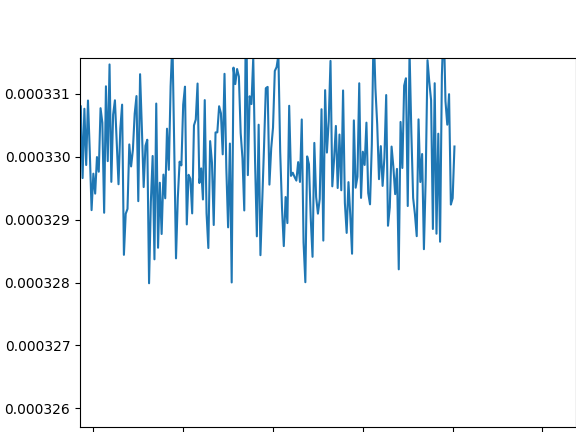

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/cow/.pyenv/versions/3.6.8/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-89-910ead4f7c9d>", line 1, in <module>
    training_loop(n_epochs =300, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)
  File "<ipython-input-50-71abd46b7531>", line 23, in training_loop
    for inputValues, ansValue in train_loader:
  File "/home/cow/.pyenv/versions/3.6.8/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 521, in __next__
    data = self._next_data()
  File "/home/cow/.pyenv/versions/3.6.8/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 561, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/home/cow/.pyenv/versions/3.6.8/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.datas

TypeError: object of type 'NoneType' has no len()

In [89]:
training_loop(n_epochs =300, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)

<IPython.core.display.Javascript object>


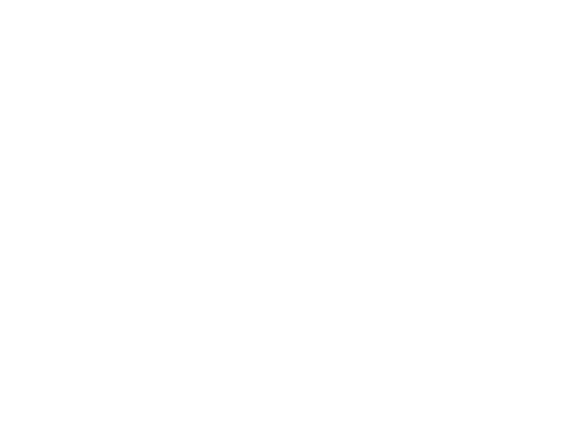

In [88]:
training_loop(n_epochs =300, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)

In [74]:
torch.save(model.state_dict(), 'fx_boaderRatePossibility_5_2days_adam_v1')

In [76]:
dummy_input, dummy_output = train_ds[0:1]

In [77]:
torch.onnx.export(model, dummy_input, 'fx_boaderRatePossibility_5_2days_adam_v1.onnx')

In [ ]:
def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

## Simple Model for test

In [191]:
class LinearNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc0 = nn.Linear(4*size, size*8)
        self.fc1 = nn.Linear(size*8, size*6)
        self.fc2 = nn.Linear(6*size, length)
        self.softmax = nn.Softmax(1)
        
    def forward(self, x):
        out = x.view(-1, 4*size)
        out = F.relu(self.fc0(out))
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.softmax(out)
        return out

In [192]:
model = LinearNet()

In [199]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [203]:
training_loop(n_epochs =1000, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)

2021-10-22 19:24:22.754888 Epoch 1, Training loss 0.0003317914673200639
2021-10-22 19:45:20.868056 Epoch 10, Training loss 0.0003316675594106335
2021-10-22 20:13:55.819655 Epoch 20, Training loss 0.0003316532728707262
2021-10-22 20:52:18.209663 Epoch 30, Training loss 0.00033226650735257847
2021-10-22 21:35:40.736326 Epoch 40, Training loss 0.00033145428826147005
2021-10-22 22:20:51.515944 Epoch 50, Training loss 0.0003314124641933116
2021-10-22 23:08:09.836940 Epoch 60, Training loss 0.00033142726628678697
2021-10-22 23:55:12.196995 Epoch 70, Training loss 0.00033140838420903996
2021-10-23 00:42:54.144048 Epoch 80, Training loss 0.0003312024520996848
2021-10-23 01:22:54.230907 Epoch 90, Training loss 0.00033126060958158025
2021-10-23 02:08:31.017359 Epoch 100, Training loss 0.0003311242985658421
2021-10-23 02:59:10.271253 Epoch 110, Training loss 0.00033117779370011956
2021-10-23 03:52:33.360748 Epoch 120, Training loss 0.0003311771145629527
2021-10-23 04:45:48.780238 Epoch 130, Train

KeyboardInterrupt: 

In [204]:
validate(model, train_dl, val_dl)

torch.return_types.topk(
values=tensor([0.0489, 0.0465, 0.0285]),
indices=tensor([ 956, 1110,  984]))
torch.return_types.topk(
values=tensor([0.0500, 0.0432, 0.0380]),
indices=tensor([1350, 1359, 1373]))
torch.return_types.topk(
values=tensor([0.0394, 0.0212, 0.0184]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0494, 0.0439, 0.0272]),
indices=tensor([1110,  956,  984]))
torch.return_types.topk(
values=tensor([0.0583, 0.0447, 0.0280]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0190, 0.0175, 0.0172]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0367, 0.0258, 0.0213]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0296, 0.0184, 0.0172]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0604, 0.0419, 0.0289]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0153, 0.0122, 0.0121]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0151, 0.0142, 0.0136]),
indices=tensor([1252, 1081, 1355]))
torch.return_types.topk(
values=tensor([0.0185, 0.0133, 0.0121]),
indices=tensor([1425, 1463, 1370]))
torch.return_types.topk(
values=tensor([0.0139, 0.0137, 0.0120]),
indices=tensor([1355, 1252, 1244]))
torch.return_types.topk(
values=tensor([0.0432, 0.0368, 0.0284]),
indices=tensor([1346, 1350, 1311]))
torch.return_types.topk(
values=tensor([0.0188, 0.0183, 0.0159]),
indices=tensor([1232, 1265, 1400]))
torch.return_types.topk(
values=tensor([0.0250, 0.0186, 0.0166]),
indices=tensor([1110, 1081, 1180]))
torch.return_types.topk(
values=tensor([0.0164, 0.0158, 0.0130]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0138, 0.0126, 0.0124]),
indices=tensor([1355, 1244, 1252]))
torch.return_types.topk(
values=tensor([0.0377, 0.0266, 0.0216]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0476, 0.0473, 0.0282]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0228, 0.0204, 0.0150]),
indices=tensor([1110, 1081, 1180]))
torch.return_types.topk(
values=tensor([0.0605, 0.0417, 0.0289]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0354, 0.0202, 0.0180]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0245, 0.0199, 0.0153]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0259, 0.0179, 0.0173]),
indices=tensor([1110, 1081, 1180]))
torch.return_types.topk(
values=tensor([0.0170, 0.0148, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0384, 0.0272, 0.0217]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0157, 0.0147, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0190, 0.0176, 0.0173]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0163, 0.0156, 0.0131]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0387, 0.0275, 0.0217]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0393, 0.0208, 0.0182]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0188, 0.0169, 0.0169]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0222, 0.0160, 0.0157]),
indices=tensor([1425, 1435, 1420]))
torch.return_types.topk(
values=tensor([0.0154, 0.0143, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0265, 0.0192, 0.0190]),
indices=tensor([1081, 1031, 1078]))
torch.return_types.topk(
values=tensor([0.0214, 0.0188, 0.0133]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.1026, 0.0727, 0.0571]),
indices=tensor([1359, 1387, 1369]))
torch.return_types.topk(
values=tensor([0.0338, 0.0180, 0.0168]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0244, 0.0141, 0.0133]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0378, 0.0267, 0.0216]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0170, 0.0143, 0.0132]),
indices=tensor([1400, 1319, 1265]))
torch.return_types.topk(
values=tensor([0.0139, 0.0139, 0.0123]),
indices=tensor([1252, 1355, 1081]))
torch.return_types.topk(
values=tensor([0.0172, 0.0169, 0.0137]),
indices=tensor([1265, 1232, 1400]))
torch.return_types.topk(
values=tensor([0.0392, 0.0211, 0.0184]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0254, 0.0183, 0.0169]),
indices=tensor([1110, 1081, 1180]))
torch.return_types.topk(
values=tensor([0.0363, 0.0188, 0.0175]),
indices=tensor([1346, 1311, 1134]))
torch.return_types.topk(
values=tensor([0.0239, 0.0197, 0.0149]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0157, 0.0147, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0144, 0.0138, 0.0131]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0286, 0.0155, 0.0154]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0396, 0.0212, 0.0184]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0437, 0.0317, 0.0221]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0480, 0.0353, 0.0215]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0126, 0.0120, 0.0119]),
indices=tensor([1463, 1400, 1416]))
torch.return_types.topk(
values=tensor([0.0155, 0.0125, 0.0120]),
indices=tensor([1400, 1319, 1416]))
torch.return_types.topk(
values=tensor([0.0182, 0.0161, 0.0155]),
indices=tensor([1400, 1319, 1232]))
torch.return_types.topk(
values=tensor([0.0333, 0.0178, 0.0167]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0180, 0.0150, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0295, 0.0184, 0.0172]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0936, 0.0632, 0.0515]),
indices=tensor([1359, 1387, 1349]))
torch.return_types.topk(
values=tensor([0.0239, 0.0195, 0.0158]),
indices=tensor([1110, 1081, 1180]))
torch.return_types.topk(
values=tensor([0.0256, 0.0201, 0.0161]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0206, 0.0196, 0.0192]),
indices=tensor([1232, 1400, 1265]))
torch.return_types.topk(
values=tensor([0.0174, 0.0173, 0.0142]),
indices=tensor([1265, 1232, 1400]))
torch.return_types.topk(
values=tensor([0.0173, 0.0171, 0.0139]),
indices=tensor([1265, 1232, 1400]))
torch.return_types.topk(
values=tensor([0.0232, 0.0162, 0.0160]),
indices=tensor([1425, 1435, 1420]))
torch.return_types.topk(
values=tensor([0.0475, 0.0349, 0.0216]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0515, 0.0389, 0.0213]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0428, 0.0294, 0.0251]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0273, 0.0203, 0.0183]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0423, 0.0304, 0.0221]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0542, 0.0419, 0.0239]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0179, 0.0150, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0154, 0.0123, 0.0120]),
indices=tensor([1400, 1319, 1416]))
torch.return_types.topk(
values=tensor([0.0161, 0.0132, 0.0119]),
indices=tensor([1400, 1319, 1416]))
torch.return_types.topk(
values=tensor([0.0209, 0.0196, 0.0194]),
indices=tensor([1232, 1400, 1265]))
torch.return_types.topk(
values=tensor([0.0585, 0.0445, 0.0281]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0139, 0.0136, 0.0120]),
indices=tensor([1355, 1252, 1244]))
torch.return_types.topk(
values=tensor([0.0191, 0.0180, 0.0175]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0264, 0.0176, 0.0175]),
indices=tensor([1110, 1180, 1081]))
torch.return_types.topk(
values=tensor([0.0302, 0.0186, 0.0173]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0162, 0.0154, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0163, 0.0132, 0.0120]),
indices=tensor([1425, 1463, 1327]))
torch.return_types.topk(
values=tensor([0.0410, 0.0241, 0.0225]),
indices=tensor([1346, 1350, 1311]))
torch.return_types.topk(
values=tensor([0.0195, 0.0156, 0.0152]),
indices=tensor([1346, 1290, 1406]))
torch.return_types.topk(
values=tensor([0.0206, 0.0193, 0.0185]),
indices=tensor([1232, 1265, 1400]))
torch.return_types.topk(
values=tensor([0.0511, 0.0409, 0.0264]),
indices=tensor([1110,  956,  984]))
torch.return_types.topk(
values=tensor([0.0324, 0.0223, 0.0191]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0291, 0.0168, 0.0165]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0546, 0.0342, 0.0240]),
indices=tensor([1110,  956,  984]))
torch.return_types.topk(
values=tensor([0.0124, 0.0123, 0.0120]),
indices=tensor([1463, 1400, 1416]))
torch.return_types.topk(
values=tensor([0.0141, 0.0133, 0.0131]),
indices=tensor([1265, 1355, 1244]))
torch.return_types.topk(
values=tensor([0.0297, 0.0160, 0.0157]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0481, 0.0381, 0.0325]),
indices=tensor([1350, 1346, 1311]))
torch.return_types.topk(
values=tensor([0.0202, 0.0196, 0.0188]),
indices=tensor([1232, 1400, 1265]))
torch.return_types.topk(
values=tensor([0.0145, 0.0139, 0.0137]),
indices=tensor([1327, 1290, 1406]))
torch.return_types.topk(
values=tensor([0.0358, 0.0250, 0.0209]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0137, 0.0129, 0.0127]),
indices=tensor([1355, 1244, 1265]))
torch.return_types.topk(
values=tensor([0.0185, 0.0165, 0.0163]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0150, 0.0137, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0427, 0.0389, 0.0293]),
indices=tensor([1346, 1350, 1311]))
torch.return_types.topk(
values=tensor([0.0271, 0.0203, 0.0180]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0137, 0.0134, 0.0130]),
indices=tensor([1265, 1355, 1244]))
torch.return_types.topk(
values=tensor([0.0144, 0.0121, 0.0112]),
indices=tensor([1400, 1416, 1319]))
torch.return_types.topk(
values=tensor([0.0262, 0.0176, 0.0175]),
indices=tensor([1110, 1081, 1180]))
torch.return_types.topk(
values=tensor([0.0518, 0.0443, 0.0289]),
indices=tensor([ 956, 1110,  984]))
torch.return_types.topk(
values=tensor([0.0181, 0.0154, 0.0150]),
indices=tensor([1346, 1290, 1406]))
torch.return_types.topk(
values=tensor([0.0195, 0.0154, 0.0148]),
indices=tensor([1425, 1435, 1370]))
torch.return_types.topk(
values=tensor([0.0211, 0.0158, 0.0152]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0222, 0.0191, 0.0138]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0196, 0.0180, 0.0121]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0190, 0.0177, 0.0173]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0153, 0.0131, 0.0119]),
indices=tensor([1425, 1463, 1327]))
torch.return_types.topk(
values=tensor([0.0163, 0.0155, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0377, 0.0199, 0.0177]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0378, 0.0200, 0.0178]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0162, 0.0132, 0.0120]),
indices=tensor([1425, 1463, 1327]))
torch.return_types.topk(
values=tensor([0.0479, 0.0352, 0.0216]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0156, 0.0145, 0.0131]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0137, 0.0129, 0.0127]),
indices=tensor([1355, 1244, 1265]))
torch.return_types.topk(
values=tensor([0.0246, 0.0166, 0.0165]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0195, 0.0195, 0.0183]),
indices=tensor([1400, 1232, 1265]))
torch.return_types.topk(
values=tensor([0.0576, 0.0495, 0.0424]),
indices=tensor([1359, 1350, 1373]))
torch.return_types.topk(
values=tensor([0.0497, 0.0434, 0.0271]),
indices=tensor([1110,  956,  984]))
torch.return_types.topk(
values=tensor([0.0522, 0.0396, 0.0219]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0204, 0.0156, 0.0150]),
indices=tensor([1425, 1435, 1370]))
torch.return_types.topk(
values=tensor([0.0405, 0.0290, 0.0219]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0657, 0.0487, 0.0442]),
indices=tensor([1359, 1350, 1373]))
torch.return_types.topk(
values=tensor([0.0269, 0.0149, 0.0146]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0208, 0.0186, 0.0129]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0183, 0.0161, 0.0156]),
indices=tensor([1400, 1319, 1232]))
torch.return_types.topk(
values=tensor([0.0136, 0.0129, 0.0128]),
indices=tensor([1355, 1244, 1265]))
torch.return_types.topk(
values=tensor([0.0167, 0.0139, 0.0127]),
indices=tensor([1400, 1319, 1265]))
torch.return_types.topk(
values=tensor([0.0293, 0.0158, 0.0156]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0193, 0.0186, 0.0178]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0139, 0.0139, 0.0122]),
indices=tensor([1252, 1355, 1081]))
torch.return_types.topk(
values=tensor([0.0195, 0.0191, 0.0181]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0269, 0.0203, 0.0177]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0438, 0.0410, 0.0312]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0158, 0.0128, 0.0120]),
indices=tensor([1400, 1319, 1416]))
torch.return_types.topk(
values=tensor([0.0156, 0.0145, 0.0143]),
indices=tensor([1425, 1327, 1435]))
torch.return_types.topk(
values=tensor([0.0189, 0.0174, 0.0171]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0138, 0.0121, 0.0115]),
indices=tensor([1400, 1416, 1463]))
torch.return_types.topk(
values=tensor([0.0169, 0.0142, 0.0131]),
indices=tensor([1400, 1319, 1265]))
torch.return_types.topk(
values=tensor([0.0252, 0.0168, 0.0166]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0603, 0.0423, 0.0288]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0138, 0.0127, 0.0119]),
indices=tensor([1355, 1244, 1252]))
torch.return_types.topk(
values=tensor([0.0141, 0.0138, 0.0126]),
indices=tensor([1252, 1355, 1081]))
torch.return_types.topk(
values=tensor([0.0414, 0.0250, 0.0229]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0402, 0.0287, 0.0219]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0386, 0.0204, 0.0180]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0427, 0.0290, 0.0249]),
indices=tensor([1346, 1350, 1311]))
torch.return_types.topk(
values=tensor([0.0148, 0.0134, 0.0131]),
indices=tensor([1265, 1232, 1355]))
torch.return_types.topk(
values=tensor([0.1921, 0.1013, 0.0659]),
indices=tensor([287, 435, 272]))
torch.return_types.topk(
values=tensor([0.0166, 0.0147, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0209, 0.0195, 0.0190]),
indices=tensor([1232, 1265, 1400]))
torch.return_types.topk(
values=tensor([0.0143, 0.0121, 0.0111]),
indices=tensor([1400, 1416, 1463]))
torch.return_types.topk(
values=tensor([0.0295, 0.0183, 0.0172]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0278, 0.0203, 0.0191]),
indices=tensor([108

torch.return_types.topk(
values=tensor([0.0174, 0.0149, 0.0139]),
indices=tensor([1400, 1319, 1265]))
torch.return_types.topk(
values=tensor([0.0636, 0.0383, 0.0368]),
indices=tensor([ 956, 1086, 1155]))
torch.return_types.topk(
values=tensor([0.0482, 0.0380, 0.0325]),
indices=tensor([1350, 1346, 1311]))
torch.return_types.topk(
values=tensor([0.0679, 0.0635, 0.0471]),
indices=tensor([1086,  956, 1155]))
torch.return_types.topk(
values=tensor([0.0188, 0.0170, 0.0169]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0275, 0.0203, 0.0186]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0136, 0.0130, 0.0129]),
indices=tensor([1355, 1265, 1244]))
torch.return_types.topk(
values=tensor([0.0484, 0.0377, 0.0326]),
indices=tensor([1350, 1346, 1311]))
torch.return_types.topk(
values=tensor([0.0235, 0.0196, 0.0147]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0133, 0.0121, 0.0119]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0190, 0.0175, 0.0172]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0902, 0.0598, 0.0500]),
indices=tensor([1359, 1387, 1349]))
torch.return_types.topk(
values=tensor([0.0272, 0.0197, 0.0193]),
indices=tensor([1081, 1031, 1078]))
torch.return_types.topk(
values=tensor([0.0150, 0.0121, 0.0118]),
indices=tensor([1400, 1416, 1319]))
torch.return_types.topk(
values=tensor([0.0143, 0.0129, 0.0118]),
indices=tensor([1425, 1463, 1327]))
torch.return_types.topk(
values=tensor([0.0179, 0.0156, 0.0148]),
indices=tensor([1400, 1319, 1232]))
torch.return_types.topk(
values=tensor([0.0173, 0.0170, 0.0138]),
indices=tensor([1265, 1232, 1400]))
torch.return_types.topk(
values=tensor([0.0543, 0.0423, 0.0291]),
indices=tensor([ 956, 1110,  984]))
torch.return_types.topk(
values=tensor([0.0209, 0.0186, 0.0129]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0183, 0.0154, 0.0151]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0181, 0.0179, 0.0151]),
indices=tensor([1232, 1265, 1400]))
torch.return_types.topk(
values=tensor([0.0139, 0.0129, 0.0118]),
indices=tensor([1425, 1463, 1327]))
torch.return_types.topk(
values=tensor([0.0179, 0.0178, 0.0148]),
indices=tensor([1232, 1265, 1400]))
torch.return_types.topk(
values=tensor([0.0189, 0.0173, 0.0171]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0634, 0.0378, 0.0365]),
indices=tensor([ 956, 1086, 1155]))
torch.return_types.topk(
values=tensor([0.0370, 0.0196, 0.0176]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0148, 0.0121, 0.0116]),
indices=tensor([1400, 1416, 1319]))
torch.return_types.topk(
values=tensor([0.0163, 0.0156, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0395, 0.0212, 0.0184]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0275, 0.0177, 0.0169]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0440, 0.0319, 0.0221]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.1105, 0.0816, 0.0631]),
indices=tensor([1359, 1387, 1369]))
torch.return_types.topk(
values=tensor([0.0187, 0.0133, 0.0122]),
indices=tensor([1425, 1463, 1370]))
torch.return_types.topk(
values=tensor([0.0921, 0.0583, 0.0508]),
indices=tensor([1086,  956, 1155]))
torch.return_types.topk(
values=tensor([0.0196, 0.0188, 0.0170]),
indices=tensor([1232, 1265, 1400]))
torch.return_types.topk(
values=tensor([0.0157, 0.0147, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0138, 0.0129, 0.0118]),
indices=tensor([1425, 1463, 1327]))
torch.return_types.topk(
values=tensor([0.0163, 0.0146, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0353, 0.0202, 0.0180]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0568, 0.0400, 0.0290]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0299, 0.0161, 0.0157]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0374, 0.0208, 0.0182]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0194, 0.0188, 0.0179]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0139, 0.0134, 0.0130]),
indices=tensor([1265, 1355, 1244]))
torch.return_types.topk(
values=tensor([0.0267, 0.0203, 0.0174]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0298, 0.0169, 0.0166]),
indices=tensor([1346, 1134, 1290]))
torch.return_types.topk(
values=tensor([0.0182, 0.0160, 0.0155]),
indices=tensor([1400, 1319, 1232]))
torch.return_types.topk(
values=tensor([0.0255, 0.0169, 0.0166]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0388, 0.0205, 0.0180]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0421, 0.0303, 0.0221]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0171, 0.0168, 0.0128]),
indices=tensor([1081, 1252, 1355]))
torch.return_types.topk(
values=tensor([0.0158, 0.0128, 0.0120]),
indices=tensor([1400, 1319, 1416]))
torch.return_types.topk(
values=tensor([0.0641, 0.0402, 0.0377]),
indices=tensor([ 956, 1086, 1155]))
torch.return_types.topk(
values=tensor([0.0139, 0.0134, 0.0130]),
indices=tensor([1265, 1355, 1244]))
torch.return_types.topk(
values=tensor([0.0199, 0.0189, 0.0173]),
indices=tensor([1232, 1265, 1400]))
torch.return_types.topk(
values=tensor([0.0145, 0.0121, 0.0113]),
indices=tensor([1400, 1416, 1319]))
torch.return_types.topk(
values=tensor([0.0164, 0.0157, 0.0130]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0180, 0.0150, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0166, 0.0165, 0.0130]),
indices=tensor([1081, 1252, 1355]))
torch.return_types.topk(
values=tensor([0.0235, 0.0198, 0.0155]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0471, 0.0391, 0.0321]),
indices=tensor([1350, 1346, 1311]))
torch.return_types.topk(
values=tensor([0.0370, 0.0260, 0.0215]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0151, 0.0141, 0.0137]),
indices=tensor([1252, 1081, 1355]))
torch.return_types.topk(
values=tensor([0.0250, 0.0181, 0.0180]),
indices=tensor([1081, 1031, 1078]))
torch.return_types.topk(
values=tensor([0.0291, 0.0157, 0.0155]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0600, 0.0323, 0.0262]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0268, 0.0203, 0.0176]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0330, 0.0195, 0.0177]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0370, 0.0207, 0.0182]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0189, 0.0184, 0.0161]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0138, 0.0126, 0.0124]),
indices=tensor([1355, 1244, 1252]))
torch.return_types.topk(
values=tensor([0.0170, 0.0148, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0352, 0.0245, 0.0205]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0291, 0.0157, 0.0155]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0207, 0.0157, 0.0151]),
indices=tensor([1425, 1435, 1370]))
torch.return_types.topk(
values=tensor([0.0297, 0.0202, 0.0176]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0298, 0.0184, 0.0172]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0137, 0.0128, 0.0123]),
indices=tensor([1355, 1244, 1265]))
torch.return_types.topk(
values=tensor([0.0152, 0.0145, 0.0142]),
indices=tensor([1425, 1327, 1435]))
torch.return_types.topk(
values=tensor([0.0180, 0.0156, 0.0149]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0139, 0.0129, 0.0123]),
indices=tensor([1355, 1252, 1244]))
torch.return_types.topk(
values=tensor([0.0149, 0.0145, 0.0141]),
indices=tensor([1425, 1327, 1435]))
torch.return_types.topk(
values=tensor([0.0494, 0.0366, 0.0212]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0169, 0.0142, 0.0131]),
indices=tensor([1400, 1319, 1265]))
torch.return_types.topk(
values=tensor([0.0209, 0.0196, 0.0193]),
indices=tensor([1232, 1400, 1265]))
torch.return_types.topk(
values=tensor([0.1921, 0.1013, 0.0659]),
indices=tensor([287, 435, 272]))
torch.return_types.topk(
values=tensor([0.0283, 0.0191, 0.0169]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0265, 0.0203, 0.0172]),
indices=tensor([1081, 1252, 1031]))
torch.return_types.topk(
values=tensor([0.0238, 0.0192, 0.0172]),
indices=tensor([1081, 1110, 1031]))
torch.return_types.topk(
values=tensor([0.0146, 0.0145, 0.0140]),
indices=tensor([142

torch.return_types.topk(
values=tensor([0.0232, 0.0137, 0.0132]),
indices=tensor([1425, 1370, 1463]))
torch.return_types.topk(
values=tensor([0.0598, 0.0430, 0.0287]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0203, 0.0196, 0.0189]),
indices=tensor([1232, 1400, 1265]))
torch.return_types.topk(
values=tensor([0.0145, 0.0138, 0.0131]),
indices=tensor([1252, 1355, 1081]))
torch.return_types.topk(
values=tensor([0.0193, 0.0133, 0.0124]),
indices=tensor([1425, 1463, 1370]))
torch.return_types.topk(
values=tensor([0.0293, 0.0183, 0.0171]),
indices=tensor([1425, 1420, 1435]))
torch.return_types.topk(
values=tensor([0.0124, 0.0123, 0.0120]),
indices=tensor([1463, 1400, 1416]))
torch.return_types.topk(
values=tensor([0.0217, 0.0189, 0.0135]),
indices=tensor([1081, 1252, 1197]))
torch.return_types.topk(
values=tensor([0.0187, 0.0168, 0.0168]),
indices=tensor([1400, 1319, 1232]))
torch.return_types.topk(
values=tensor([0.0363, 0.0192, 0.0174]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0620, 0.0343, 0.0336]),
indices=tensor([ 956, 1155, 1086]))
torch.return_types.topk(
values=tensor([0.0194, 0.0154, 0.0148]),
indices=tensor([1425, 1435, 1370]))
torch.return_types.topk(
values=tensor([0.0163, 0.0161, 0.0131]),
indices=tensor([1252, 1081, 1355]))
torch.return_types.topk(
values=tensor([0.0453, 0.0329, 0.0220]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0413, 0.0296, 0.0220]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0307, 0.0171, 0.0167]),
indices=tensor([1346, 1134, 1290]))
torch.return_types.topk(
values=tensor([0.0136, 0.0132, 0.0130]),
indices=tensor([1355, 1265, 1244]))
torch.return_types.topk(
values=tensor([0.0189, 0.0155, 0.0151]),
indices=tensor([1346, 1290, 1406]))
torch.return_types.topk(
values=tensor([0.0167, 0.0147, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0509, 0.0382, 0.0209]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0539, 0.0415, 0.0236]),
indices=tensor([1110, 1180, 1049]))
torch.return_types.topk(
values=tensor([0.0216, 0.0215, 0.0155]),
indices=tensor([1110, 1081, 1078]))
torch.return_types.topk(
values=tensor([0.0194, 0.0189, 0.0180]),
indices=tensor([1400, 1232, 1319]))
torch.return_types.topk(
values=tensor([0.0128, 0.0121, 0.0121]),
indices=tensor([1400, 1463, 1416]))
torch.return_types.topk(
values=tensor([0.0444, 0.0322, 0.0220]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0124, 0.0123, 0.0120]),
indices=tensor([1463, 1400, 1416]))
torch.return_types.topk(
values=tensor([0.0471, 0.0345, 0.0217]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0139, 0.0121, 0.0114]),
indices=tensor([1400, 1416, 1463]))
torch.return_types.topk(
values=tensor([0.0156, 0.0125, 0.0120]),
indices=tensor([1400, 1319, 1416]))
torch.return_types.topk(
values=tensor([0.0236, 0.0139, 0.0132]),
indices=tensor([

torch.return_types.topk(
values=tensor([0.0162, 0.0154, 0.0131]),
indices=tensor([1265, 1232, 1244]))
torch.return_types.topk(
values=tensor([0.0139, 0.0134, 0.0121]),
indices=tensor([1355, 1252, 1244]))
torch.return_types.topk(
values=tensor([0.1921, 0.1013, 0.0659]),
indices=tensor([287, 435, 272]))
torch.return_types.topk(
values=tensor([0.0388, 0.0211, 0.0183]),
indices=tensor([1425, 1420, 1370]))
torch.return_types.topk(
values=tensor([0.0328, 0.0226, 0.0193]),
indices=tensor([1110, 1180,  927]))
torch.return_types.topk(
values=tensor([0.0177, 0.0150, 0.0145]),
indices=tensor([1425, 1435, 1327]))
torch.return_types.topk(
values=tensor([0.0259, 0.0188, 0.0186]),
indices=tensor([1081, 1031, 1078]))
torch.return_types.topk(
values=tensor([0.0139, 0.0128, 0.0124]),
indices=tensor([1355, 1252, 1244]))
torch.return_types.topk(
values=tensor([0.0137, 0.0128, 0.0122]),
indices=tensor([1355, 1244, 1265]))
torch.return_types.topk(
values=tensor([0.0139, 0.0137, 0.0120]),
indices=tensor([135

In [60]:
import logging
import logging.handlers

root_logger = logging.getLogger()
root_logger.setLevel(logging.INFO)

# Some libraries attempt to add their own root logger handlers. This is
# annoying and so we get rid of them.
for handler in list(root_logger.handlers):
    root_logger.removeHandler(handler)

logfmt_str = "%(asctime)s %(levelname)-8s pid:%(process)d %(name)s:%(lineno)03d:%(funcName)s %(message)s"
formatter = logging.Formatter(logfmt_str)

streamHandler = logging.StreamHandler()
streamHandler.setFormatter(formatter)
streamHandler.setLevel(logging.DEBUG)

root_logger.addHandler(streamHandler)


In [79]:
def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

差分行列

In [73]:
import random
import datetime
import numpy
import pandas as pd

class FXDiffBoaderDataset:
    def __init__(self, isTraining = True, seed=0, mode="default"):
        random.seed(seed)
        rates = pd.read_csv('/mnt/landisk/data/fx/NextBoaderPossibility/fx_USDJPY_5_2020-08-03T23-05-00_to_2021-12-04T07-50-00.csv', header=0, index_col=0, parse_dates=True)
        diff_array = rates.iloc[1:].values - rates.iloc[0:-1].values
        data = pd.DataFrame(diff_array, columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])#, 'EMA', 'BoaderValue'])
        data.tick_volume = rates.tick_volume
        data.spread = rates.spread
        rollingWindow = 10
        boaders, nan_index_head, nan_index_last = self.BoaderValueDiff(rates, rollingWindow, False)
        data["BoaderValue"] = boaders[1:]
        print(f"{nan_index_head} to {nan_index_last}")
        self.all_data = data[nan_index_head:nan_index_last]
        length = len(self.all_data)
        print(length)
            
        self.dataRange = datetime.timedelta(days=2)
        self.dims = 5
        self.mode = mode
        INTERVAL_DAYS = 2
        MINUTES_SPAN = 5

        totalMinutes = INTERVAL_DAYS * 24 * 60
        self.span  = int(totalMinutes/MINUTES_SPAN)+1
        
        ##select random indices.
        self.indices = random.sample(range(0, length - self.span -1), k=length - self.span -1)
        if isTraining:
            self.fromIndex = 0
            self.toIndex = int(length*0.7)
        else:
            self.fromIndex = int(length*0.7)+1
            self.toIndex = length+1
        
        if self.mode == "nrate":
            self.outputFunc = self.__getNormalizedAnsRates__
        elif self.mode == "default":
            self.outputFunc = self.__getAnsRates__
        elif self.mode == "array":
            self.outputFunc = self.__getAnsArray__
            
    def __getDiffArray__(self, data):
        for i in range(1,len(data)):
            data[i] - data[i-1]
        
    def __rateToArray__(self, value):
        output = [0 for i in range(0,3000)]
        i = round((value -0.85)*10000)
        if i >= 3000:
            i = 2999
        elif i < 0:
            i = 0
        output[i] = 1
        return output
        
    def __len__(self):
        return self.toIndex - self.fromIndex
    
    def __getAnsRates__(self,ndx):
        ans = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                currentValue = self.all_data['close'].iloc[index]
                ans.append(currentValue - self.all_data['BoaderValue'].iloc[index])
        else:
            index = ndx
            currentValue = self.all_data['close'].iloc[index]
            ans = [currentValue - self.all_data['BoaderValue'].iloc[index]]
        return ans
    
    def __getNormalizedAnsRates__(self,ndx):
        ans = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                maxValue = self.all_data['high'].iloc[index:index+self.span].values.max()
                ans.append(self.all_data['BoaderValue'].iloc[index]/maxValue)
        else:
            index = ndx
            maxValue = self.all_data['high'].iloc[index:index+self.span].values.max()
            ans = [self.all_data['BoaderValue'].iloc[index]/maxValue]
        return ans
    
    def __getAnsArray__(self, ndx):
        ans = []
        for value in self.__getNormalizedAnsRates__(ndx):
            ans.append(
                self.__rateToArray__(value)
            )
        return ans
    
    def __getInputs__(self, ndx):
        inputs = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                print(index)
                inputs.append([
                    self.all_data.high[index:index+self.span].values.tolist(),
                    self.all_data.low[index:index+self.span].values.tolist(),
                    self.all_data.open[index:index+self.span].values.tolist(),
                    self.all_data.close[index:index+self.span].values.tolist(),
                    self.all_data.tick_volume[index:index+self.span].values.tolist(),
                    self.all_data.spread[index:index+self.span].values.tolist()
                ])
        else:
            index = ndx
            inputs = [
                    self.all_data.high[index:index+self.span].values.tolist(),
                    self.all_data.low[index:index+self.span].values.tolist(),
                    self.all_data.open[index:index+self.span].values.tolist(),
                    self.all_data.close[index:index+self.span].values.tolist(),
                    self.all_data.tick_volume[index:index+self.span].values.tolist(),
                    self.all_data.spread[index:index+self.span].values.tolist()
            ]

        return inputs
    
    def BoaderValueDiff(self, rates, frame, removeNan=True):
        def updateNextBoaders(start, end, value, previouseValue):
            if previouseValue != -1:
                for i in range(start, end+1):
                    nextBoaders.append(value - previouseValue)
                
                return 0
            else:
                for i in range(start, end+1):
                    nextBoaders.append(numpy.NaN)
                return end - start

        data = rates.copy()
        ma = data.close.rolling(frame).mean()
        if ma[frame-1] == numpy.NaN:
            print("invalid")
            return None
        data["EMA"] = ma
        initial = frame
        startIndex = initial
        lastNanIndex = initial
        nextBoaders = [numpy.NaN for i in range(0,initial)]
        trend = 0
        previouseValue = -1

        for index in range(initial, len(data)):
            diff = data.EMA[index-1] - data.EMA[index]
            if diff >= 0:
                if trend == -1:
                    lastNanIndex += updateNextBoaders(startIndex, index, data.EMA[index], previouseValue)
                    startIndex = index+1
                    previouseValue = data.EMA[index]
                trend = 1
            else:
                if trend == 1:
                    lastNanIndex += updateNextBoaders(startIndex, index, data.EMA[index], previouseValue)
                    startIndex = index+1
                    previouseValue = data.EMA[index]
                trend = -1
                

        updateNextBoaders(startIndex, len(data)-1, numpy.NaN, numpy.NaN)
        result = len(data) == len(nextBoaders)
        print(f"Result:{result}")
        if result:
            if removeNan:
                return nextBoaders[lastNanIndex:startIndex]
            else:
                return nextBoaders, lastNanIndex, startIndex
        else:
            print(f"{len(data)} !== {len(nextBoaders)}")
    
    def __getitem__(self, ndx):
        ins = numpy.array(self.__getInputs__(ndx), dtype=numpy.dtype('float32'))
        outputs = numpy.array(self.outputFunc(ndx), dtype=numpy.dtype('float32'))
        return torch.tensor(ins, device=device).to(dtype=dtype), torch.tensor(outputs, device=device).to(dtype=dtype)
        return ins, outputs
    
    def changeMode(self, mode):
        self.mode = mode
        if self.mode == "nrate":
            self.outputFunc = self.__getNormalizedAnsRates__
        elif self.mode == "default":
            self.outputFunc = self.__getAnsRates__
        elif self.mode == "array":
            self.outputFunc = self.__getAnsArray__

In [74]:
train_ds = FXDiffBoaderDataset(True, 1017)

Result:True
35 to 99921
99886


In [75]:
i,o = train_ds[0:10]

63087
83256
55961
25005
12332
46291
40948
13345
38308
35650


In [76]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(6,12, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(12,8, kernel_size=5, padding=2)
        self.fc6 = nn.Linear(8*size, 4*size)
        self.fc7 = nn.Linear(4*size, size)
        self.fc8 = nn.Linear(size, 1)
                
    def forward(self, x):
        out = torch.tanh(self.conv1(x))
        out = torch.tanh(self.conv2(out))
        out = out.view(-1, 8*size)
        out = F.relu(self.fc6(out))
        out = F.relu(self.fc7(out))
        out = torch.tanh(self.fc8(out))
        return out

In [81]:
batch_size=32
train_dl = DataLoader(train_ds, batch_size = batch_size,  drop_last = True, shuffle=True)
model = Net().to(device)

In [92]:
optimizer = optim.Adam(model.parameters(), lr=1e-7)
loss_fn = nn.MSELoss()

In [93]:
inputData, outputData = train_ds[0:10]
out = model(inputData)
print(outputData)
print(out)

63087
83256
55961
25005
12332
46291
40948
13345
38308
35650
tensor([ 0.0135,  0.0132,  0.1255,  0.0974,  0.0271,  0.0464, -0.0960, -0.0265,
        -0.0011,  0.1006], device='cuda:0')
tensor([[ 0.0135],
        [-0.0505],
        [ 0.1255],
        [ 0.0974],
        [ 0.0271],
        [ 0.0464],
        [-0.0960],
        [-0.0265],
        [-0.0011],
        [ 0.1006]], device='cuda:0', grad_fn=<TanhBackward0>)


In [82]:
model.load_state_dict(torch.load('fx_boarderDiff_5_2days_adam_v1', map_location=device))

<All keys matched successfully>

<IPython.core.display.Javascript object>


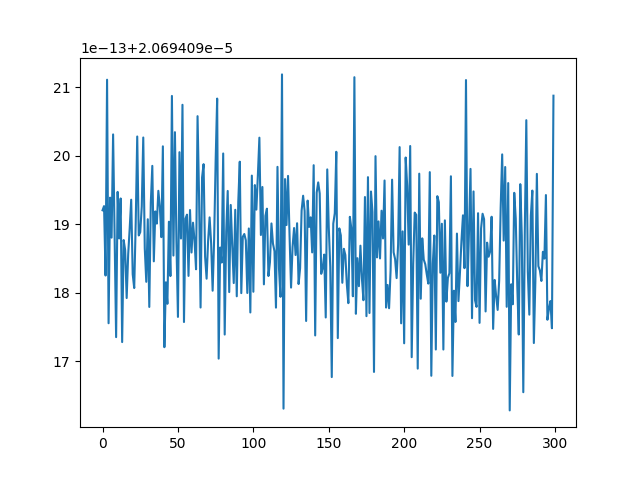

In [102]:
training_loop(n_epochs =300, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)

In [100]:
torch.save(model.state_dict(), 'fx_boarderDiff_5_2days_adam_v2')

In [101]:
dummy_input, dummy_output = train_ds[0:1]
torch.onnx.export(model, dummy_input, 'fx_boarderDiff_5_2days_adam_v2.onnx')

63087


In [72]:
print("a")

a


In [9]:
import random
import datetime
import numpy
import pandas as pd

class FXNextNDataset:
    def __init__(self,n,isTraining = True, seed=0, datatype="diff",mode="default"):
        random.seed(seed)
        rates = pd.read_csv('/mnt/landisk/data/fx/NextBoaderPossibility/fx_USDJPY_5_2020-08-03T23-05-00_to_2021-12-04T07-50-00.csv', header=0, index_col=0, parse_dates=True)
        
        self.next = n
        if datatype == "diff":
            diff_array = rates.iloc[1:].values - rates.iloc[0:-1].values
            data = pd.DataFrame(diff_array, columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])#, 'EMA', 'BoaderValue'])
            data.tick_volume = rates.tick_volume
            data.spread = rates.spread
            self.all_data = data
        else:
            self.all_data = rates.sort_index()
            
        length = len(self.all_data)
        
        ##select random indices.
        self.indices = random.sample(range(n, length-1), k=length-1-n)
        if isTraining:
            self.fromIndex = n
            self.toIndex = int(length*0.7)
        else:
            self.fromIndex = int(length*0.7)+1
            self.toIndex = length+1
            
        self.dataRange = datetime.timedelta(days=2)
        self.dims = 5
        self.mode = mode
        INTERVAL_DAYS = 2
        MINUTES_SPAN = 5

        totalMinutes = INTERVAL_DAYS * 24 * 60
        self.span  = int(totalMinutes/MINUTES_SPAN)+1
        self.outputFunc = self.__getAnsBinary__
                
    def __len__(self):
        return self.toIndex - self.fromIndex
        
    def __getAnsBinary__(self,ndx):
        if type(ndx) == slice:
            ans = []
            for index in self.indices[ndx]:
                ans_temp = self.all_data.close.iloc[index+self.next] - self.all_data.close.iloc[index]
                ans_i = numpy.zeros_like(ans_temp)
                ans_i[ans_temp > 0] = 1
                ans.append(ans_i)
        else:
            index = ndx
            ans = [0]
            if self.all_data.close.iloc[index+self.next] - self.all_data.close.iloc[index] > 0:
                ans = [1]
        return ans
    
    def __getAnsArray__(self, ndx):
        ans = []
        for value in self.__getNormalizedAnsRates__(ndx):
            ans.append(
                self.__rateToArray__(value)
            )
        return ans
    
    def __getInputs__(self, ndx):
        inputs = []
        if type(ndx) == slice:
            for index in self.indices[ndx]:
                print(index)
                inputs.append([
                    self.all_data.high[index:index+self.span].values.tolist(),
                    self.all_data.low[index:index+self.span].values.tolist(),
                    self.all_data.open[index:index+self.span].values.tolist(),
                    self.all_data.close[index:index+self.span].values.tolist(),
                    self.all_data.tick_volume[index:index+self.span].values.tolist(),
                    self.all_data.spread[index:index+self.span].values.tolist()
                ])
        else:
            index = ndx
            inputs = [
                    self.all_data.high[index:index+self.span].values.tolist(),
                    self.all_data.low[index:index+self.span].values.tolist(),
                    self.all_data.open[index:index+self.span].values.tolist(),
                    self.all_data.close[index:index+self.span].values.tolist(),
                    self.all_data.tick_volume[index:index+self.span].values.tolist(),
                    self.all_data.spread[index:index+self.span].values.tolist()
            ]

        return inputs
    
    def __getitem__(self, ndx):
        inputs = numpy.array(self.__getInputs__(ndx),  dtype=numpy.dtype('float32'))
        outputs = numpy.array(self.outputFunc(ndx), dtype=numpy.dtype('float32'))
        return torch.tensor(inputs, device=device).to(dtype=dtype), torch.tensor(outputs, device=device).to(dtype=dtype)
        return inputs, outputs
        #return inputs, outputs

In [37]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(6,12, kernel_size=5, padding=2)
        self.conv2 = nn.Conv1d(12,8, kernel_size=5, padding=2)
        self.fc6 = nn.Linear(8*size, 4*size)
        self.fc7 = nn.Linear(4*size, size)
        self.fc8 = nn.Linear(size, 1)
        
    def forward(self, x):
        out = torch.tanh(self.conv1(x))
        out = torch.tanh(self.conv2(out))
        out = out.view(-1, 8*size)
        out = F.relu(self.fc6(out))
        out = F.relu(self.fc7(out))
        out = torch.sigmoid(self.fc8(out))
        #out = out.view(-1, 8*size)
        #out = F.relu(self.fc2(out))
        #out = self.fc2(out)
        return out

In [67]:
from torch.utils.data import DataLoader
batch_size=32
train_ds = FXNextNDataset(1)
train_dl = DataLoader(train_ds, batch_size = batch_size,  drop_last = True, shuffle=True)
model = Net().to(device)

In [39]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.BCELoss()

In [40]:
inputData, outputData = train_ds[13:16]
out = model(inputData)
print(out)
print(outputData)

66151
18255
36942
tensor([[0.4975],
        [0.5023],
        [0.5056]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([1., 0., 0.], device='cuda:0')


<IPython.core.display.Javascript object>


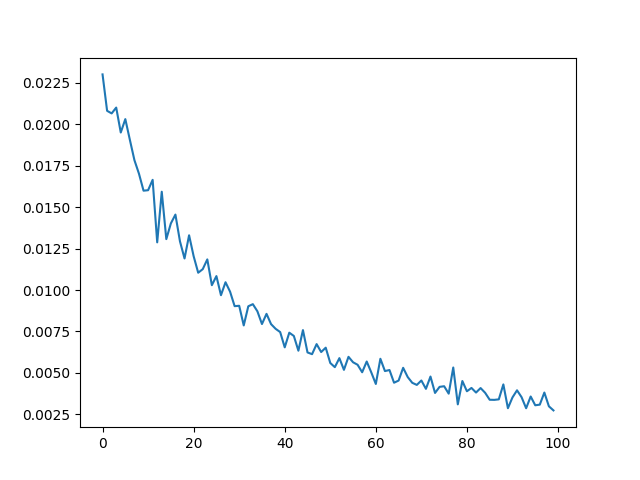

In [42]:
training_loop(n_epochs =100, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)

<IPython.core.display.Javascript object>


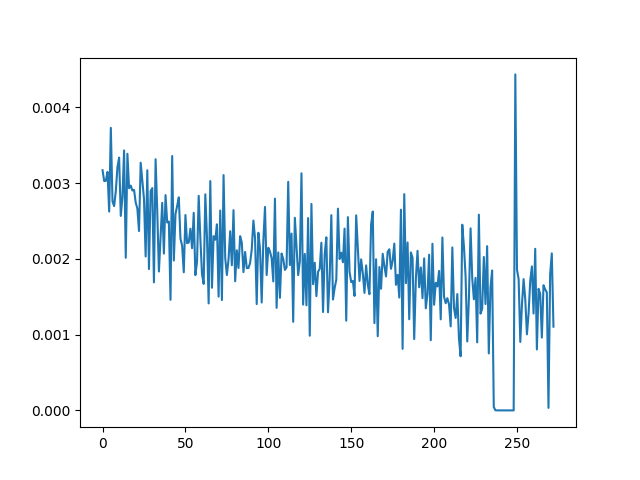

KeyboardInterrupt: 

In [43]:
training_loop(n_epochs =300, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_dl)

In [44]:
torch.save(model.state_dict(), 'fx_next1UD_5_2days_adam_temp')

In [63]:
model = torch.load('fx_next1UD_5_2days_adam_temp')

In [68]:
dummy_input, dummy_output = train_ds[0:1]

50495


In [69]:
dummy_output

tensor([0.], device='cuda:0')

In [70]:
torch.onnx.export(model, dummy_input, 'fx_next1UD_5_2days_adam_temp.onnx')